In [249]:
import os
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import SimpleITK as sitk
import shutil
import json

# Method 1 - CF + KNN for rib-suppression

In [ ]:
lung_mask_gray = cv2.cvtColor(lung_mask, cv2.COLOR_BGR2GRAY)
lm_row_index, lm_col_index = lung_mask_gray.nonzero()

plt.figure(figsize=(10,10))
plt.imshow(lung_mask)
plt.show()

In [ ]:
img_ribs = np.zeros(img.shape,dtype=img.dtype)
img_ribs[img_2!=img] = img[img_2!=img]
img_ribs[lung_mask==0]=0
img_ribs_gray = cv2.cvtColor(img_ribs, cv2.COLOR_BGR2GRAY)

img_ribs_2 = np.zeros(img.shape,dtype=img.dtype)
img_ribs_2[img_3!=img] = img[img_3!=img]
img_ribs_2[lung_mask==0]=0
img_ribs_gray_2 = cv2.cvtColor(img_ribs_2, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(10,10))
plt.imshow(img_ribs)
# plt.savefig("rib_idea_demo.png",)
plt.show()

In [ ]:
img_wth_ribs[lung_mask==0] = img[lung_mask==0]
img_wth_ribs_gray = cv2.cvtColor(img_wth_ribs, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(img_wth_ribs)
plt.show()

In [ ]:
# from surprise import SVD
from surprise import Dataset
from surprise import Reader
import pandas as pd
from surprise import KNNWithMeans
from surprise.model_selection import GridSearchCV, cross_validate

## Tissue Profiling

In [ ]:
row_index, col_index = img_wth_ribs_gray.nonzero()
record_arr = np.zeros((len(row_index), 3))
for i,(r,c) in enumerate(zip(row_index, col_index)):
    record_arr[i][0], record_arr[i][1] = r, c
    record_arr[i][2] = img_wth_ribs_gray[r,c]
record_df = pd.DataFrame(record_arr)
record_df.columns = ['userID', 'itemID', 'rating']
record_df = record_df.astype(int)

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0, 255))
traindata = Dataset.load_from_df(record_df[['userID', 'itemID', 'rating']], reader=reader)
train_data_full = traindata.build_full_trainset()

In [ ]:
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between items
}

algo = KNNWithMeans(k=3, sim_options=sim_options)
algo.fit(train_data_full)

In [ ]:
row_index, col_index = img_ribs_gray.nonzero()
for i, (r,c) in enumerate(zip(row_index, col_index)):
    if i % 100000 == 0:
        print('%d/%d'%(i, len(row_index)))
    img_wth_ribs_gray[r,c] = algo.predict(r,c).est

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ribs_extract, cmap='gray')
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img_wth_ribs_gray, cmap='gray')
plt.show()

## Rib Profiling

In [ ]:
# iter 1
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

knned_ribs = np.zeros(img_gray.shape)
knned_ribs[img_ribs_gray != 0] = img_wth_ribs_gray[img_ribs_gray != 0]

ribs_extract = img_ribs_gray - knned_ribs

deribed_img_2 = img_gray.copy()
deribed_img_2[img_ribs_gray != 0] = img_gray[img_ribs_gray != 0] - deribed_img_Ex[img_ribs_gray != 0]

row_index, col_index = ribs_extract.nonzero()
record_arr = np.zeros((len(row_index), 3))
for i,(r,c) in enumerate(zip(row_index, col_index)):
    record_arr[i][0], record_arr[i][1] = r, c
    record_arr[i][2] = img_wth_ribs_gray[r,c]
record_df = pd.DataFrame(record_arr)
record_df.columns = ['userID', 'itemID', 'rating']
record_df = record_df.astype(int)

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0, 255))
traindata = Dataset.load_from_df(record_df[['userID', 'itemID', 'rating']], reader=reader)
train_data_rib_full = traindata.build_full_trainset()

sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between items
}

rib_algo = KNNWithMeans(k=15, sim_options=sim_options)
rib_algo.fit(train_data_rib_full)

row_index, col_index = ribs_extract.nonzero()
for i, (r,c) in enumerate(zip(row_index, col_index)):
    if i % 100000 == 0:
        print('%d/%d'%(i, len(row_index)))
    ribs_extract[r,c] = rib_algo.predict(r,c).est
 
deribed_img = img_gray - 0.15 * ribs_extract

In [ ]:
# iter 2
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
knned_ribs = np.zeros(img_gray.shape)
knned_ribs[img_ribs_gray != 0] = deribed_img[img_ribs_gray != 0]
ribs_extract = img_ribs_gray - knned_ribs

row_index, col_index = ribs_extract.nonzero()
record_arr = np.zeros((len(row_index), 3))
for i,(r,c) in enumerate(zip(row_index, col_index)):
    record_arr[i][0], record_arr[i][1] = r, c
    record_arr[i][2] = img_wth_ribs_gray[r,c]
record_df = pd.DataFrame(record_arr)
record_df.columns = ['userID', 'itemID', 'rating']
record_df = record_df.astype(int)

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0, 255))
traindata = Dataset.load_from_df(record_df[['userID', 'itemID', 'rating']], reader=reader)
train_data_rib_full = traindata.build_full_trainset()



sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between items
}

rib_algo = KNNWithMeans(k=5, sim_options=sim_options)
rib_algo.fit(train_data_rib_full)

row_index, col_index = ribs_extract.nonzero()
for i, (r,c) in enumerate(zip(row_index, col_index)):
    if i % 100000 == 0:
        print('%d/%d'%(i, len(row_index)))
    ribs_extract[r,c] = rib_algo.predict(r,c).est

ribs_extract_blr = cv2.GaussianBlur(ribs_extract, (3,3),0)
deribed_img = img_gray - 0.15 * ribs_extract_blr

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(deribed_img, cmap='gray')
plt.savefig('derib_img.png', dpi=500)
plt.show()

In [ ]:
# tissue_deribed_img = np.zeros(deribed_img.shape)
# tissue_deribed_img[img_ribs_gray==0] = deribed_img[img_ribs_gray==0]

# rib_deribed_img = np.zeros(deribed_img.shape)
# rib_deribed_img[img_ribs_gray!=0] = deribed_img[img_ribs_gray!=0]

# # kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3)) 
# # deribed_img_Ex = cv2.morphologyEx(rib_deribed_img, cv2.MORPH_OPEN, kernel, iterations=5) 
# deribed_img_Ex = cv2.morphologyEx(rib_deribed_img, cv2.MORPH_CLOSE, kernel, iterations=2) 

# tissue_deribed_img[img_ribs_gray!=0] = deribed_img_Ex[img_ribs_gray!=0]

In [ ]:
deribed_grad = v_diff(deribed_img)
deribed_img_2_1 = deribed_img.copy()
deribed_img_2_2 = deribed_img.copy()

CI_90, CI_95, C_995 = 1.645, 1.96, 2.575

radius = 5
# Blue color in BGR
color = (255, 0, 0)
# Line thickness of 2 px
thickness = 2

for col in range(deribed_grad.shape[-1]):
    if col % 100 == 0:
        print('%d/%d'%(col, deribed_grad.shape[-1]))
    col_std = np.std(deribed_grad[:,col])
    row_index_up = (deribed_grad[:,col]> col_std * CI_90).nonzero()[0]
    row_index_down = (deribed_grad[:,col]<- col_std * CI_90).nonzero()[0]
    row_idx = np.concatenate((row_index_up, row_index_down))
    
    for idx in row_idx:
        deribed_img_2_1[idx,col] = algo.predict(idx,col).est 
        
        center_coordinates = (col, idx)
        deribed_img_2_2 = cv2.circle(deribed_img_2_2, center_coordinates, radius, color, thickness)

In [ ]:
deribed_img_2 = deribed_img.copy()
for i in row_index_up:
    center_coordinates = (1700, i)
 
    # Radius of circle
    radius = 5
  
    # Blue color in BGR
    color = (255, 0, 0)
  
    # Line thickness of 2 px
    thickness = 2
  
    # Using cv2.circle() method
    # Draw a circle with blue line borders of thickness of 2 px
    deribed_img_2 = cv2.circle(deribed_img_2, center_coordinates, radius, color, thickness)
for i in row_index_down:
    center_coordinates = (1700, i)
 
    # Radius of circle
    radius = 5
  
    # Blue color in BGR
    color = (255, 0, 0)
  
    # Line thickness of 2 px
    thickness = 2
  
    # Using cv2.circle() method
    # Draw a circle with blue line borders of thickness of 2 px
    deribed_img_2 = cv2.circle(deribed_img_2, center_coordinates, radius, color, thickness)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(deribed_grad[:,1700])
plot_pacf(deribed_grad[:,1700])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(deribed_grad_2[:,1700])
plot_pacf(deribed_grad_2[:,1700])
plt.show()

In [ ]:
deribed_grad = v_diff(deribed_img)
deribed_grad_2 = v_diff(deribed_img_2)
plt.figure(figsize=(10,10))
plt.plot(deribed_grad[:,1700],'b',alpha=1)
plt.plot(deribed_grad_2[:,1700],'r',alpha=0.8)
plt.plot(np.linspace(0, deribed_grad.shape[0], deribed_grad.shape[0]), 
         deribed_grad.shape[0]*[np.std(deribed_grad[:,1700])*1.645], 'g')
plt.plot(np.linspace(0, deribed_grad.shape[0], deribed_grad.shape[0]), 
         deribed_grad.shape[0]*[-np.std(deribed_grad[:,1700])*1.645], 'g')
plt.show()

## Edge Smoothing

In [ ]:
def v_diff(mat):
    diff = np.zeros(mat.shape, dtype=mat.dtype)
    diff[0,:] = mat[0, :]
    
    rs = mat.shape[0]
    for r in range(rs-1):
        diff[r+1,:] = mat[r+1,:] - mat[r,:]
    
    return diff

In [ ]:
def v_intgral(mat):
    intg = np.zeros(mat.shape, dtype=mat.dtype)
    intg[0,:] = mat[0, :]
    
    rs = mat.shape[0]
    for r in range(rs-1):
        intg[r+1,:] = mat[r+1,:] + intg[r,:]
    
    return intg

In [ ]:
def SES_Smoothing(arr, alpha=0.5):
    smoothed = np.zeros(input_arr.shape)
    for i in range(input_arr.shape[0]):
        if i==0:
            smoothed[i] = input_arr[0]
        else:
            smoothed[i] = alpha*smoothed[i-1] + (1-alpha)*input_arr[i]
    return smoothed

In [ ]:
row_index, col_index = lung_mask_gray.nonzero()
row_min, row_max = row_idx.min(), row_idx.max()
cols = list(np.unique(col_index))

smoothed_arr = np.zeros(deribed_img.shape)
input_arr = deribed_img[row_min: row_max ,cols]
smoothed_arr[row_min: row_max ,cols] = SES_Smoothing(input_arr)


In [ ]:
for_plot = np.zeros(deribed_grad.shape)
for_plot[img_ribs_gray!=0] = deribed_img[img_ribs_gray!=0]
plt.figure(figsize=(10,10))
plt.plot(for_plot[:,1700],'b',alpha=1)
plt.plot(smoothed_arr[:,1700],'r',alpha=0.5)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(img_gray[:,1700],'b',alpha=1)
plt.plot(deribed_img[:,1700],'r',alpha=0.5)
plt.show()
# plt.plot(rib_img_2[:,500],'b',alpha=0.5)
# plt.plot(rib_img_2[:,500],'b',alpha=0.5)

## Edge Removal

In [ ]:
img_2 = img.copy()
plt.figure(figsize=(10,10))
# plt.imshow(gray,cmap='gray')
# R rib mask&convex hull
k = 20
for cnt in R_ind_ctrs:      
#     cv2.fillPoly(img_2,pts=[cont],color=(255,0,255))
# for cnt in R_whl_ctrs:
#     hull = cv2.convexHull(cnt)
    cv2.drawContours(img_2, [cnt], -1, (0, 0, 255), k)
# L rib mask&convex hull
for cnt in L_ind_ctrs:
#     cv2.fillPoly(img_2,pts=[cnt],color=(255,0,255))
# # for cnt in L_whl_ctrs:
#     hull = cv2.convexHull(cnt)
    cv2.drawContours(img_2, [cnt], -1, (0, 0, 255), k)

plt.imshow(img_2)
# plt.savefig("rib_idea_demo.png",)
plt.show()

In [ ]:
deribed_img_2 = deribed_img.copy()
rib_edge = np.zeros(deribed_img.shape)
img_rib_cnt_thick_gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
flag = img_rib_cnt_thick_gray != img_gray
flag[lung_mask_gray==0]=False
rib_edge[flag] = deribed_img[flag]
rib_edge = cv2.GaussianBlur(rib_edge, (3,3),0)
deribed_img_2[flag] = 0
deribed_img_2 += rib_edge

In [ ]:
row_index, col_index = deribed_img_2.nonzero()
record_arr = np.zeros((len(row_index), 3))
for i,(r,c) in enumerate(zip(row_index, col_index)):
    record_arr[i][0], record_arr[i][1] = r, c
    record_arr[i][2] = img_wth_ribs_gray[r,c]
record_df = pd.DataFrame(record_arr)
record_df.columns = ['userID', 'itemID', 'rating']
record_df = record_df.astype(int)

reader = Reader(line_format='user item rating', sep=',', rating_scale=(0, 255))
traindata = Dataset.load_from_df(record_df[['userID', 'itemID', 'rating']], reader=reader)
train_data_edge_full = traindata.build_full_trainset()

In [ ]:
sim_options = {
    "name": "cosine",
    "user_based": True,  # Compute  similarities between items
}

edge_algo = KNNWithMeans(k=9, sim_options=sim_options)
edge_algo.fit(train_data_edge_full)

In [ ]:
row_index, col_index = rib_edge.nonzero()
for i, (r,c) in enumerate(zip(row_index, col_index)):
    if i % 100000 == 0:
        print('%d/%d'%(i, len(row_index)))
    deribed_img[r,c] = edge_algo.predict(r,c).est

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(deribed_img_2, cmap='gray')
# plt.savefig('deribed.png',dpi=500)
plt.show()

## I am here

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(deribed_img, cmap='gray')
# plt.savefig("rib_idea_demo.png",)
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(grad_rib, cmap='gray')
# plt.savefig("rib_idea_demo.png",)
plt.show()

In [ ]:
def v_intgral(mat):
    intg = np.zeros(mat.shape, dtype=mat.dtype)
    intg[0,:] = mat[0, :]
    
    rs = mat.shape[0]
    for r in range(rs-1):
        intg[r+1,:] = mat[r+1,:] + intg[r,:]
    
    return intg

In [ ]:
grad_img_1,grad_img_2 = np.gradient(g_img)
rib_img_1,rib_img_2 = np.gradient(g_img)

In [ ]:
grad_img = v_diff(g_img)
grad_rib = v_diff(g_img_ribs)
# img_residual = grad_img - grad_rib
reverse = v_intgral(img_residual)

In [ ]:
from skimage.measure import profile_line
p = profile_line(grad_img[], (45, 30), (160, 30))

In [ ]:
grad_rib

In [ ]:
plt.plot(grad_img_2[:,500],'r',alpha=0.5)
# plt.plot(rib_img_2[:,500],'b',alpha=0.5)


In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
plt.savefig("org_img.png",dpi=500)
plt.show()

In [ ]:
g_img_ribs = cv2.cvtColor(img_ribs, cv2. COLOR_BGR2GRAY)
g_img = cv2.cvtColor(img, cv2. COLOR_BGR2GRAY)

In [ ]:
Ky_1 = np.array([[-1],[0],[1]])
Fy_img_r = ndimage.convolve(Fy_img, Ky_1)

In [ ]:
g_img

In [ ]:
Fy_img.cumsum(axis=0)

In [ ]:
Fy_img

In [ ]:
Fy_img = np.diff(g_img,axis=0)


In [ ]:
from scipy import ndimage
Ky = -1*np.array([[-1],[0],[1]])
Fy_img = ndimage.convolve(g_img, Ky)
Fy_rib = ndimage.convolve(g_img_ribs, Ky)
Fy_residual = Fy_img - Fy_rib

In [ ]:
Kx = -1*np.array([[-1,0,1]])
Fx = ndimage.convolve(g_img, Kx)

In [ ]:
img_grads = np.diff(g_img, axis=1)
rib_grads = np.diff(g_img_ribs, axis=1)
final_grads = img_grads - rib_grads
org_img = np.cumsum(final_grads, axis=0)
# rib_grads = v_diff(g_img_ribs)
# final_grads = img_grads - rib_grads
# intg = v_intg(final_grads)
# diff_g_rib_1, diff_g_rib_2 = np.gradient(g_img_ribs)

# diff_g_img -= diff_g_ribs
# g_img_2 = np.cumsum(diff_g_img, axis=0)

In [ ]:
img_2 = img.copy()

plt.figure(figsize=(10,10))
for cnt in R_whl_ctrs:
    hull = cv2.convexHull(cnt)
    cv2.fillPoly(img_2,pts=[hull],color=(255,0,255))
for cnt in L_whl_ctrs:
    hull = cv2.convexHull(cnt)
    cv2.fillPoly(img_2,pts=[hull],color=(255,0,255))

plt.imshow(img_2)
# plt.savefig("rib_idea_demo.png",)
plt.show()


dbl_lungs = np.zeros(img.shape,dtype=img.dtype)
dbl_lungs[img!=img_2] = img[img!=img_2].copy()
heatmap_img = cv2.applyColorMap(dbl_lungs, cv2.COLORMAP_JET)
fin = cv2.addWeighted(heatmap_img, 0.5, dbl_lungs, 0.5, 0)

plt.figure(figsize=(10,10))
plt.imshow(fin)
plt.savefig("rib_idea_demo.png",)
plt.show()

plt.figure(figsize=(10,10))
for cnt in R_ind_ctrs:
    cv2.drawContours(fin,[cnt],0,(255,0,255),2)
for cnt in L_ind_ctrs:
    cv2.drawContours(fin,[cnt],0,(255,0,255),2)
plt.imshow(fin)
# plt.savefig("rib_idea_demo.png",)
plt.show()

In [ ]:
# g_img_2 = cv2.cvtColor(img, cv2. COLOR_BGR2GRAY)
g_img_2  = img.copy()

img_t = img.copy()
for cnt in R_whl_ctrs:
    hull = cv2.convexHull(cnt)
    cv2.fillPoly(img_t,pts=[hull],color=(255,0,255))
# g_img_t = cv2.cvtColor(img_t, cv2. COLOR_BGR2GRAY)

R_lungs = np.zeros(g_img_2.shape,dtype=g_img_2.dtype)
R_lungs[g_img_2!=img_t] = g_img_2[g_img_2!=img_t]
# g_img_2[g_img_2!=g_img_t]= np.NaN
# L = g_img_2[g_img_t!=g_img_2].shape[0]
# l = np.ceil(np.sqrt(g_img_2[g_img_t!=g_img_2].shape[0]))

# pred_path = \
# '/home/flute/CT2CXR/img_translation/pytorch-CycleGAN-and-pix2pix/results/vinDr_pix2pix/test_latest/images/VinDr_RibCXR_val_022_R_fake_B.png'
# preds = cv2.imread(pred_path,-1)
# preds = cv2.cvtColor(preds, cv2. COLOR_BGR2GRAY)
# preds = cv2.resize(preds, (int(l),int(l)))

# g_img_2[g_img_t!=g_img_2] = preds.flatten()[:L]


In [ ]:
img_2 = img.copy()

plt.figure(figsize=(10,10))
for cnt in R_whl_ctrs:
    hull = cv2.convexHull(cnt)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.fillPoly(img_2,pts=[hull],color=(255,0,255))
R_lungs = np.zeros(img.shape,dtype=img.dtype)
R_lungs[img!=img_2] = img[img!=img_2].copy()
R_lungs_2 = R_lungs.copy()
for cnt in R_ind_ctrs:
    cv2.fillPoly(R_lungs_2,pts=[cnt],color=(255,0,255))

# for cnt in L_whl_ctrs:
#     hull = cv2.convexHull(cnt)
#     cv2.fillPoly(img_2,pts=[hull],color=(255,0,255))
# 2 gray scale
g_R_lungs= cv2. cvtColor(R_lungs, cv2. COLOR_BGR2GRAY)
g_R_lungs_2= cv2. cvtColor(R_lungs_2, cv2. COLOR_BGR2GRAY)
g_img = cv2. cvtColor(img, cv2. COLOR_BGR2GRAY)
g_img_2 = cv2. cvtColor(img_2, cv2. COLOR_BGR2GRAY)
region_1 = g_R_lungs[g_img!=g_img_2].copy()
region_2 = g_R_lungs_2[g_img!=g_img_2].copy()
R_rib_pxls = region_1[region_1!=region_2]
R_tissue_pxls = region_1[region_1==region_1]
# plt.imshow(R_lungs_2)
# # plt.savefig("rib_idea_demo.png",)
# plt.show()



# dbl_lungs[img!=img_2] = img[img!=img_2].copy()
# heatmap_img = cv2.applyColorMap(dbl_lungs, cv2.COLORMAP_JET)
# fin = cv2.addWeighted(heatmap_img, 0.5, dbl_lungs, 0.5, 0)

# plt.figure(figsize=(10,10))
# plt.imshow(fin)
# plt.savefig("rib_idea_demo.png",)
# plt.show()

# plt.figure(figsize=(10,10))
# for cnt in R_ind_ctrs:
#     cv2.drawContours(fin,[cnt],0,(255,0,255),2)
# for cnt in L_ind_ctrs:
#     cv2.drawContours(fin,[cnt],0,(255,0,255),2)
# plt.imshow(fin)
# # plt.savefig("rib_idea_demo.png",)
# plt.show()

In [ ]:
h = int(len(R_rib_pxls)/w)
R_rib_patch = np.reshape(R_rib_pxls[:w*h], (h, w))

h = int(len(R_tissue_pxls)/w)
R_tissue_patch = np.reshape(R_tissue_pxls[:w*h], (h, w))

R_rib_patch = cv2.resize(R_rib_patch,(R_tissue_patch.shape[1], R_tissue_patch.shape[0]))

plt.figure(figsize=(10,10))
pt_map = np.concatenate((R_rib_patch, R_tissue_patch), axis=1)
heatmap_img = cv2.applyColorMap(pt_map, cv2.COLORMAP_JET)
plt.imshow(heatmap_img)

plt.figure(figsize=(10,10))
plt.imshow(pt_map, cmap='gray')

plt.show()

## 1.2 Individual Diagnosis for Colaborative Filtering

In [ ]:
def crop_image(img,tol=0):
    # img is 2D image data
    # tol  is tolerance
    mask = img>tol
    return img[np.ix_(mask.any(1),mask.any(0))]

In [ ]:
g_R_lungs = cv2.cvtColor(R_lungs, cv2. COLOR_BGR2GRAY)
croped_R_lungs = crop_image(g_R_lungs)
plt.figure(figsize=(10,10))
plt.imshow(croped_R_lungs, cmap='gray')

### 1.2.1 row based CF

In [ ]:
g_img_2_try = g_img_2.copy()

# We will fill the row wise NaN's with the corresponding user's mean ratings, so that we can carry out Pearson correlation.
# Here we assume avg ratings for the movie that is not rated.
g_img_2_try = pd.DataFrame(g_img_2_try).apply(lambda row: row.fillna(row.mean()), axis=1)

plt.figure(figsize=(10,10))
plt.imshow(np.array(g_img_2_try),cmap='gray')

### 1.2.2 column based CF

In [ ]:
g_img_2_try = g_img_2.copy()

# We will fill the row wise NaN's with the corresponding user's mean ratings, so that we can carry out Pearson correlation.
# Here we assume avg ratings for the movie that is not rated.
g_img_2_try = pd.DataFrame(g_img_2_try).apply(lambda col: col.fillna(col.mean()), axis=0)

plt.figure(figsize=(10,10))
plt.imshow(np.array(g_img_2_try),cmap='gray')
plt.show()

### 1.2.3 Model based CF

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
np.linspace(1,20,20)

In [ ]:
from sklearn.impute import KNNImputer
for i in tqdm(np.linspace(50,100,15)):
    i = int(i)
    imputer = KNNImputer(n_neighbors=i)
    data = g_img_2.copy()
    data = imputer.fit_transform(data)
    plt.figure(figsize=(10,10))
    plt.imshow(data,cmap='gray')
    plt.savefig('./knn/%d.png'%i)

In [ ]:
from sklearn.decomposition import PCA
X = croped_R_lungs.copy()
pca = PCA(n_components=.999)
principalComponents = pca.fit_transform(X)
proj = pca.inverse_transform(principalComponents)

In [ ]:
X_projected2 = principalComponents.dot(pca.components_) + pca.mean_

In [ ]:
pca.explained_variance_ratio_.shape

In [ ]:
X_pca = np.concatenate((principalComponents[:,:10], principalComponents[:,12:]), axis=1)
X_pca_comp = np.concatenate((pca.components_[:10,:], pca.components_[12:,:]), axis=0)
print(X_pca.shape, X_pca.shape)
X_projected_3 = X_pca.dot(X_pca_comp)+ pca.mean_

In [ ]:
pca.components_.shape

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(croped_R_lungs,cmap='gray')

plt.figure(figsize=(10,10))
plt.imshow(proj,cmap='gray')

In [ ]:
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 
import itertools

# Modelling Helpers :
# from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# Deep Learning Libraries
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
# from keras.utils import to_categorical

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
# import missingno as msno

# # Configure visualisations
# %matplotlib inline
# mpl.style.use( 'ggplot' )
# plt.style.use('fivethirtyeight')
# sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)

## Batch Processing - for GAN

In [ ]:
data_dir = '../../ShengNAS2/SharedProjectData/MICCAI_2022/VinDr_RibCXR_Dataset/'

path = \
'../../ShengNAS2/SharedProjectData/MICCAI_2022/VinDr_RibCXR_Dataset/Annotations/train/Vindr_RibCXR_train_mask.json'

save_path = '../../ShengNAS2/SharedProjectData/MICCAI_2022/VinDr_BSE'
for s in ['train', 'val']:
    A_dir = os.path.join(save_path,s.replace('val', 'test')+'A')
    B_dir = os.path.join(save_path,s.replace('val', 'test')+'B')
    clean_path(A_dir); clean_path(B_dir);
    
    img_dir = os.path.join(data_dir, 'Data', s, 'img')
    ann_path =  os.path.join(data_dir, 'Annotations', s, 'Vindr_RibCXR_%s_mask.json'%s)
    with open(ann_path, 'r') as f:
        anns = json.load(f)
    for ky in tqdm(list(anns['img'].keys())):
        # rib contour extraction 
        R_ind_ctrs, R_whl_ctrs, L_ind_ctrs, L_whl_ctrs = lung_ctrs(anns, ky)
        
        img_path = os.path.join(data_dir, anns['img'][ky])
        img = cv2.imread(img_path)
        # extract pixel intensity
        R_rib_pxls, R_tissue_pxls, Rw = extract_rib_lung_pxls(img, R_ind_ctrs, R_whl_ctrs)
        R_rib_patch, R_tissue_patch = create_patch(R_rib_pxls, R_tissue_pxls, Rw, 800)
        L_rib_pxls, L_tissue_pxls, Lw = extract_rib_lung_pxls(img, L_ind_ctrs, L_whl_ctrs)
        L_rib_patch, L_tissue_patch = create_patch(L_rib_pxls, L_tissue_pxls, Lw, 800)
        A_path = os.path.join(A_dir, anns['img'][ky].split('/')[-1])
        B_path = os.path.join(B_dir, anns['img'][ky].split('/')[-1])
        cv2.imwrite(A_path.replace('.png', '_R.png'), R_rib_patch)
        cv2.imwrite(B_path.replace('.png', '_R.png'), R_tissue_patch)
        
        cv2.imwrite(A_path.replace('.png', '_L.png'), L_rib_patch)
        cv2.imwrite(B_path.replace('.png', '_L.png'), L_tissue_patch)

In [ ]:
def clean_path(filepath):
    if not os.path.exists(filepath):
        os.makedirs(filepath)
    else: 
        shutil.rmtree(filepath)
        os.makedirs(filepath)

In [ ]:
def lung_ctrs(ann, key):
    R_keys = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10']
    R_ind_ctrs = []
    for item in R_keys:
        coords = ann[item][key]
        ctr = []
        for coord in coords:
            x, y = coord['x'], coord['y']
            ctr.append([x,y])
        R_ind_ctrs.append(np.array(ctr, dtype=np.int32))

    ctr = []
    for item in keys:
        coords = ann[item][key]
        for coord in coords:
            x, y = coord['x'], coord['y']
            ctr.append([x,y])
    R_whl_ctrs=[np.array(ctr, dtype=np.int32)]


    L_keys = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10']
    L_ind_ctrs = []
    for item in L_keys:
        coords = ann[item][key]
        ctr = []
        for coord in coords:
            x, y = coord['x'], coord['y']
            ctr.append([x,y])
        L_ind_ctrs.append(np.array(ctr, dtype=np.int32))

    ctr = []
    for item in L_keys:
        coords = ann[item][key]
        for coord in coords:
            x, y = coord['x'], coord['y']
            ctr.append([x,y])
    L_whl_ctrs=[np.array(ctr, dtype=np.int32)]
    
    return R_ind_ctrs, R_whl_ctrs, L_ind_ctrs, L_whl_ctrs

In [ ]:
def extract_rib_lung_pxls(img, ind_ctrs, whl_ctrs):
    img_2 = img.copy()

#     plt.figure(figsize=(10,10))
    for cnt in whl_ctrs:
        hull = cv2.convexHull(cnt)
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.fillPoly(img_2,pts=[hull],color=(255,0,255))
    lungs = np.zeros(img.shape,dtype=img.dtype)
    lungs[img!=img_2] = img[img!=img_2].copy()
    lungs_2 = lungs.copy()
    for cnt in ind_ctrs:
        cv2.fillPoly(lungs_2,pts=[cnt],color=(255,0,255))
        
    # 2 gray scale
    g_lungs= cv2. cvtColor(lungs, cv2. COLOR_BGR2GRAY)
    g_lungs_2= cv2. cvtColor(lungs_2, cv2. COLOR_BGR2GRAY)
    g_img = cv2. cvtColor(img, cv2. COLOR_BGR2GRAY)
    g_img_2 = cv2. cvtColor(img_2, cv2. COLOR_BGR2GRAY)
    region_1 = g_lungs[g_img!=g_img_2].copy()
    region_2 = g_lungs_2[g_img!=g_img_2].copy()
    rib_pxls = region_1[region_1!=region_2]
    tissue_pxls = region_1[region_1==region_1]
    
    return rib_pxls, tissue_pxls, w

In [ ]:
def create_patch(rib_pxls, tissue_pxls, w, final_w):
    h = int(len(rib_pxls)/w)
    rib_patch = np.reshape(rib_pxls[:w*h], (h, w))

    h = int(len(tissue_pxls)/w)
    tissue_patch = np.reshape(tissue_pxls[:w*h], (h, w))

    rib_patch = cv2.resize(rib_patch,(final_w, final_w))
    tissue_patch = cv2.resize(tissue_patch, (final_w, final_w))
    
    return rib_patch, tissue_patch

In [ ]:
# '''
# all ribs batch reading
# '''


# # keys = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 
# # 'R9', 'R10', 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10']

# R_keys = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10']
# R_ind_ctrs = []
# for item in R_keys:
#     coords = ann[item]['0']
#     ctr = []
#     for coord in coords:
#         x, y = coord['x'], coord['y']
#         ctr.append([x,y])
#     R_ind_ctrs.append(np.array(ctr, dtype=np.int32))

# ctr = []
# for item in keys:
#     coords = ann[item]['0']
    
#     for coord in coords:
#         x, y = coord['x'], coord['y']
#         ctr.append([x,y])
# R_whl_ctrs=[np.array(ctr, dtype=np.int32)]


# L_keys = ['L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10']
# L_ind_ctrs = []
# for item in L_keys:
#     coords = ann[item]['0']
#     ctr = []
#     for coord in coords:
#         x, y = coord['x'], coord['y']
#         ctr.append([x,y])
#     L_ind_ctrs.append(np.array(ctr, dtype=np.int32))

# ctr = []
# for item in L_keys:
#     coords = ann[item]['0']
    
#     for coord in coords:
#         x, y = coord['x'], coord['y']
#         ctr.append([x,y])
# L_whl_ctrs=[np.array(ctr, dtype=np.int32)]

In [ ]:
# img_2 = img.copy()
# img_3 = img.copy()
# k = 30
# plt.figure(figsize=(10,10))
# # plt.imshow(gray,cmap='gray')
# # R rib mask&convex hull
# for cnt in R_ind_ctrs:
#     cv2.fillPoly(img_2,pts=[cnt],color=(255,0,255))
#     cv2.fillPoly(img_3,pts=[cnt],color=(255,0,255))
# # for cnt in R_whl_ctrs:
# #     hull = cv2.convexHull(cnt)
#     cv2.drawContours(img_3, [cnt], -1, (0, 0, 255), k)
# # L rib mask&convex hull
# for cnt in L_ind_ctrs:
#     cv2.fillPoly(img_2,pts=[cnt],color=(255,0,255))
#     cv2.fillPoly(img_3,pts=[cnt],color=(255,0,255))
# # for cnt in L_whl_ctrs:
# #     hull = cv2.convexHull(cnt)
#     cv2.drawContours(img_3, [cnt], -1, (0, 0, 255), k)

# plt.imshow(img_2)
# # plt.savefig("rib_idea_demo.png",)
# plt.show()

In [ ]:
# path = '../../ShengNAS2/SharedProjectData/MICCAI_2022/VinDr_RibCXR_Dataset/Data/train/img/VinDr_RibCXR_train__lung_mask.png'
# lung_mask = cv2.imread(path)

# Method 2 - physical model gradient-based supression

## data processomg

In [564]:
ann_path = \
'../../ShengNAS2/SharedProjectData/MICCAI_2022/VinDr_RibCXR_Dataset/Annotations/train/Vindr_RibCXR_train_mask.json'
img_path = \
'../../ShengNAS2/SharedProjectData/MICCAI_2022/VinDr_RibCXR_Dataset/Data/train/img/VinDr_RibCXR_train_000.png'


with open(ann_path, 'r') as f:
    ann = json.load(f)
img = cv2.imread(img_path)
g_img = cv2. cvtColor(img, cv2. COLOR_BGR2GRAY)

In [565]:
'''
take only L5 ribs of img of #0 as a starter trial
'''

l5_coords = ann['L5']['0']
l5_ctr = []
for coord in l5_coords:
    x, y = coord['x'], coord['y']
    l5_ctr.append([x,y])
l5_ctr = np.array(l5_ctr, dtype=np.int32)

## EDA

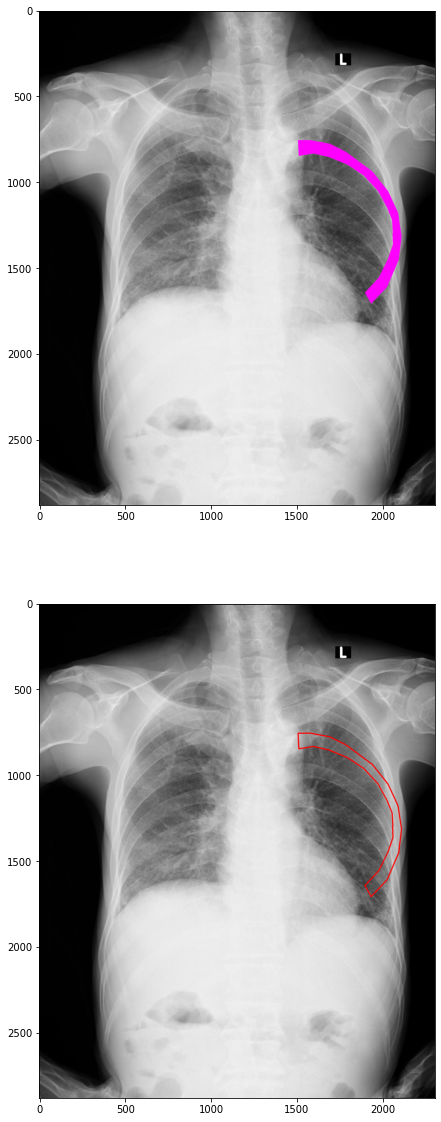

In [566]:
'''
visualize r5 ribs
'''

img_2 = img.copy()
img_3 = img.copy()
k = 5

plt.figure(figsize=(10,20))

ax1 = plt.subplot(211)
cv2.fillPoly(img_2,pts=[l5_ctr],color=(255,0,255))
ax1.imshow(img_2)

ax2 = plt.subplot(212, sharex=ax1)
cv2.drawContours(img_3, [l5_ctr], -1, (255, 0, 0), k)
ax2.imshow(img_3)

# plt.savefig("rib_L5.png",dpi=1000)
plt.show()

[1507, 757, 602, 951]


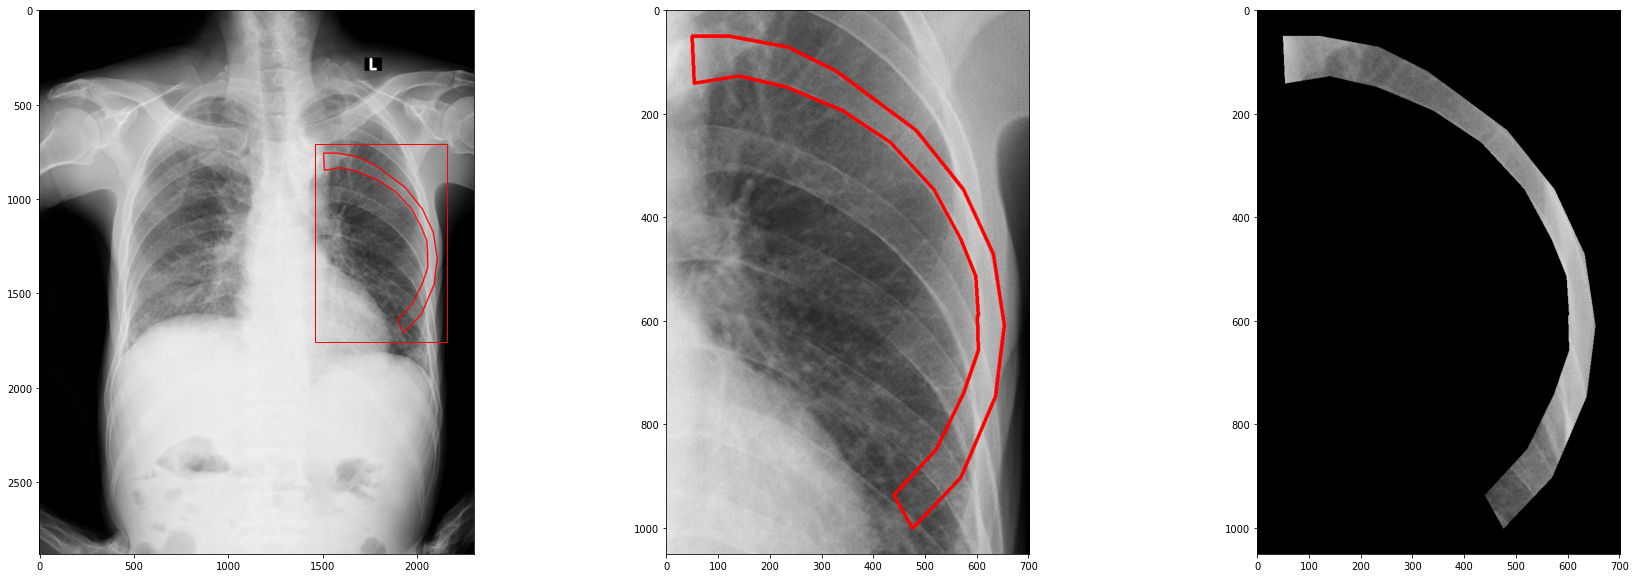

In [567]:
'''
img preprocessing
'''

x_min, x_max, y_min, y_max = 10000, 0, 10000, 0

for i in range(len(l5_ctr)):
    x, y = l5_ctr[i]
    if x < x_min: x_min = x
    if x > x_max: x_max = x
    
    if y < y_min: y_min = y
    if y > y_max: y_max = y

# bbox in the form of xywh
margin = 50
bbox = [x_min, y_min, x_max-x_min, y_max-y_min]
wide_bbox = [x_min - margin, y_min - margin, 
             x_max-x_min + 2*margin, y_max-y_min + 2*margin]
print(bbox)

import matplotlib.patches as patches

fig = plt.figure(figsize=(30,10))

ax1 = fig.add_subplot(131)
rect = patches.Rectangle(wide_bbox[:2], wide_bbox[2], wide_bbox[3], linewidth=1, edgecolor='r', facecolor='none')
ax1.add_patch(rect)
ax1.imshow(img_3)

ax2 = fig.add_subplot(132)
patch_1 = img_3[wide_bbox[1]:wide_bbox[1]+wide_bbox[3], wide_bbox[0]:wide_bbox[0]+wide_bbox[2],:]
ax2.imshow(patch_1)

ax3 = fig.add_subplot(133)
l5_rib = np.zeros(img.shape,dtype=img.dtype)
l5_rib[img_2!=img] = img[img_2!=img]
patch_2 = l5_rib[wide_bbox[1]:wide_bbox[1]+wide_bbox[3], wide_bbox[0]:wide_bbox[0]+wide_bbox[2],:]
ax3.imshow(patch_2)

plt.savefig("rib_L5.png",dpi=500)
plt.show()

## Step 1 - ST Transformation

In [596]:
def break_rib(approx, key,  k=3):
    
    if 'R' in key:
        cut_idx = np.argmin(approx[:,0])
    elif 'L' in key:
        cut_idx = np.argmax(approx[:,0])
    else:
        raise Exception("key not provide right, has to be L# or R#")

    dist_lst = []
    arr = np.concatenate([approx[:cut_idx-k], approx[cut_idx+k:]], axis=0)
    
    for i in range(arr.shape[0]):
        p1 = approx[cut_idx]
        p2 = arr[i]
        dist_lst.append(np.sum((p1-p2)**2))
    dist_lst = np.array(dist_lst)
    opposite_idx = np.argmin(dist_lst)

    for i in range(approx.shape[0]):
        if (approx[i]==arr[opposite_idx]).sum()==2:
            break
    idx_ls = np.array([cut_idx, i])
    l_idx = np.argmax(idx_ls)
    ctr1 = np.concatenate([approx[:idx_ls[l_idx-1] + 1], approx[idx_ls[l_idx]:]], axis=0)
    ctr2 = approx[idx_ls[l_idx-1] : idx_ls[l_idx] + 1]
    return ctr1, ctr2

49


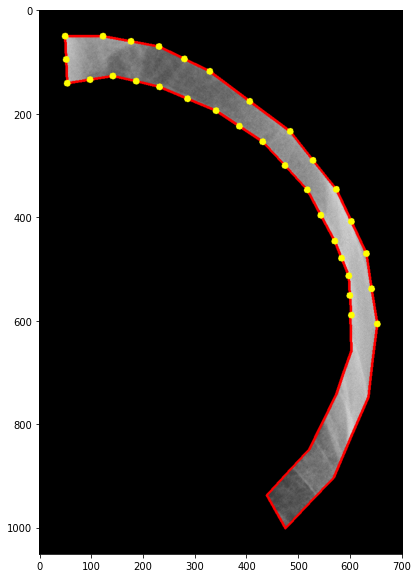

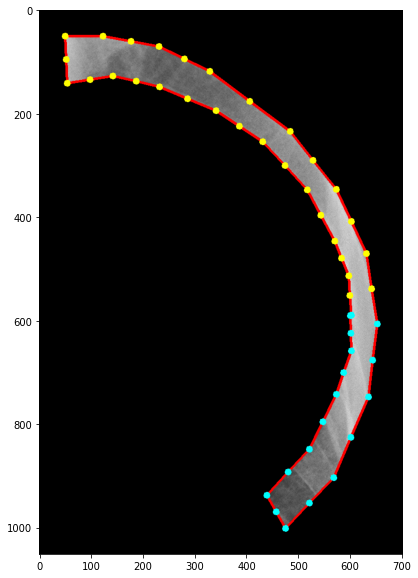

In [592]:
'''
find sparse ctr of L5 rib
'''
gray_patch_2 = cv2.cvtColor(patch_2, cv2.COLOR_BGR2GRAY)
# l5_ctr_xy and l5_ctr_st is ctr coordinate only based on patch_2
ret, thresh = cv2.threshold(gray_patch_2, 1, 255, 0)
contours, hierarchy = \
    cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
# calc arclentgh
arclen = cv2.arcLength(cnt, True)

# do approx
eps = 0.0005
epsilon = arclen * eps
approx = cv2.approxPolyDP(cnt, epsilon, True)

approx = np.squeeze(approx, axis=1)

approx = expand_ctr(approx)
print(len(approx))

plt.figure(figsize=(10,10))
img_temp = patch_2.copy()

# for i in range(approx.shape[0] - 1): 
#     img_temp = cv2.circle(img_temp, approx[i], 3, (255, 0, 0), 5)    

cv2.drawContours(img_temp, [approx], -1, (255, 0, 0), 4)
ctr1, ctr2 = break_rib(approx, 'L7')

for tt in range(ctr1.shape[0]): 
    img_temp = cv2.circle(img_temp, ctr1[tt], 3, (255, 255, 0), 5)
plt.imshow(img_temp)  
plt.show()

plt.figure(figsize=(10,10))
# ctr2 = approx[cut_idx : i + 1]
for tt in range(ctr2.shape[0]): 
    img_temp = cv2.circle(img_temp, ctr2[tt], 3, (0, 255, 255), 5)
plt.imshow(img_temp)   
plt.show()

# l5_ctr_patch_2 = approx.copy()

In [299]:
dist_lst = []
arr = np.concatenate([approx[:8-3,:], approx[8+3:, ]], axis=0)
for i in range(arr.shape[0]):
    p1 = approx[8]
    p2 = arr[i]
    dist_lst.append(np.sum((p1-p2)**2))
dist_lst = np.array(dist_lst)

In [ ]:
'''
process rib segment coordinates in XY System
'''

y_idxes, x_idxes = np.ma.where(gray_patch_2 != 0)  ### attention there is a flip here!!!!!
l5_segment_xy_ls = []
for x,y in zip(list(x_idxes),list(y_idxes)):
    l5_segment_xy_ls.append((x,y))
l5_segment_xy = np.array(l5_segment_xy_ls, dtype=np.int64)

plt.figure(figsize=(10,10))
img_temp = patch_2.copy()
for i in range(l5_segment_xy.shape[0] - 1): 
    img_temp = cv2.circle(img_temp, l5_segment_xy[i], 3, (255, 0, 0), 5)
plt.imshow(img_temp) 

In [ ]:
'''
arrange ctr Tangent line set and calculate culmulate distance
'''
line_sets = []
ctr_neighbor_dist = []
d = 0

lr = LinearRegression()
for i in range(l5_ctr_patch_2.shape[0]):
    if i == l5_ctr_patch_2.shape[0]-1:
        p1 = l5_ctr_patch_2[i]
        p2 = l5_ctr_patch_2[0]
    else:
        p1 = l5_ctr_patch_2[i]
        p2 = l5_ctr_patch_2[i+1]
    
    line_sets.append([p1, p2])
    d += np.sqrt(np.sum((p1-p2)**2))
    ctr_neighbor_dist.append(d.copy())

# for i in range(len(line_sets)): 
#     plt.figure(figsize=(10,10))
#     img_temp = patch_2.copy()
#     cv2.drawContours(img_temp, [approx], -1, (255, 0, 0), 4)
#     img_temp = cv2.circle(img_temp, line_sets[i][0], 3, (255, 0, 0), 5)
#     img_temp = cv2.circle(img_temp, line_sets[i][1], 3, (0, 0, 255), 5)
#     plt.imshow(img_temp)   

In [ ]:
def proj_calc(p1, p2, p3):
    l2 = np.sum((p1-p2)**2)
    param = np.sum((p3 - p1) * (p2 - p1)) / l2
    #         if param > 1 or param < 0:
    #             print('p3 does not project onto p1-p2 line segment')
    
    param = max(0, min(1, np.sum((p3 - p1) * (p2 - p1)) / l2))
    p_proj = p1 + param * (p2 - p1)

    l_proj = np.sqrt(np.sum((p_proj - p1)**2))
    h = np.sqrt(np.sum((p3 - p_proj)**2))
    return l_proj, h

In [ ]:
'''
transformation all the point in xy coordinate system to st coordinate system
'''

l5_segment_st_ls = []
gray_patch_2_s = np.zeros(gray_patch_2.shape, dtype=np.int32)
gray_patch_2_t = np.zeros(gray_patch_2.shape, dtype=np.int32)

tmax = int(ctr_neighbor_dist[-1]) + 1
smax = 42 + 1
st_mat = np.zeros((smax, tmax), dtype=img.dtype)

for ct, p3 in enumerate(l5_segment_xy):
    if ct%10000==0: print('%d out of %d is processed ....'%(ct, len(l5_segment_xy_ctr_ls)))
    
    d_min= 10000
    idx = 0
    l_proj = 0
    for i in range(len(line_sets)):
        p1 = line_sets[i][0]
        p2 = line_sets[i][1]
        
        l_proj_c, d = proj_calc(p1, p2, p3)
        
        if d < d_min:
            d_min = np.copy(d)
            l_proj = np.copy(l_proj_c)
            idx = np.copy(i)
    
    t = int(proj_coord(idx, l_proj, ctr_neighbor_dist))
    s = int(d_min)
    l5_segment_st_ls.append( (s, t) ) ### record to match the l5_segment_xy set they are 121 correspondence

    x,y = p3
    gray_patch_2_s[y,x] = np.copy(s * gray_patch_2[y,x])
    gray_patch_2_t[y,x] = np.copy(t * gray_patch_2[y,x])
    
    st_mat[s,t] = gray_patch_2[y,x].copy()

st_mat = st_mat.astype(np.int64)
print('all done!')


In [ ]:
'''
step 1 result visualization
'''

# #ofP=25; eps = 0.0005
print( np.sort( gray_patch_2_s[gray_patch_2!=0] )[0], np.sort( gray_patch_2_s[gray_patch_2!=0] )[-1] )

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.imshow(gray_patch_2_s, cmap='gray')

ax2 = fig.add_subplot(122)
ax2.imshow(gray_patch_2_t, cmap='gray')
# plt.savefig("rib_L5_st_inxy.png",dpi=1000)
plt.show()

fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
ax.imshow(np.flipud(st_mat), cmap='gray')
# plt.savefig("rib_L5_st.png",dpi=1000)
plt.show()

## Step 2 - partial derivative in ST Space

In [ ]:
'''
calculate partial derivative of s along the row dimension (where s is stored.)
'''

deri_st_mat = np.zeros(st_mat.shape, dtype=np.int64)
deri_st_mat[0,:] = st_mat[0,:].copy()

for i in range(1, st_mat.shape[0]):
    deri_st_mat[i,:] = (st_mat[i,:] - st_mat[i-1,:]).copy()

In [ ]:
gray_patch_2_ds = np.zeros(gray_patch_2.shape, dtype=np.int64)
gray_patch_2_dt = np.zeros(gray_patch_2.shape, dtype=np.int64)

for (s,t), (x,y) in zip(l5_segment_st_ls, l5_segment_xy):
#     import pdb; pdb.set_trace()
    dI = deri_st_mat[s,t].copy()
    
    gray_patch_2_ds[y,x] = np.copy(s * dI)
    gray_patch_2_dt[y,x] = np.copy(t * dI)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.imshow(gray_patch_2_ds, cmap='gray')

ax2 = fig.add_subplot(122)
ax2.imshow(gray_patch_2_dt, cmap='gray')
plt.savefig("rib_L5_dst_inxy.png",dpi=300)
plt.show()

fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
ax.imshow(np.flipud(deri_st_mat), cmap='gray')
# plt.savefig("rib_L5_st.png",dpi=1000)
plt.show()

## Step 3 - Derivaive Smoothing along t-axis

#### Method 1 - Gaussian Smoothing

In [ ]:
from scipy.ndimage import gaussian_filter
smoothed_deri_st_mat = gaussian_filter(deri_st_mat.astype(np.float64), sigma = (0, st_mat.shape[-1]*3), mode='nearest')

In [ ]:
gray_patch_2_sds = np.zeros(gray_patch_2.shape, dtype=np.float64)
gray_patch_2_sdt = np.zeros(gray_patch_2.shape, dtype=np.float64)

for (s,t), (x,y) in zip(l5_segment_st_ls, l5_segment_xy):
#     import pdb; pdb.set_trace()
    sdI = smoothed_deri_st_mat[s,t].copy()
    
    gray_patch_2_sds[y,x] = np.copy(s * sdI)
    gray_patch_2_sdt[y,x] = np.copy(t * sdI)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(121)
ax1.imshow(gray_patch_2_sds, cmap='gray')

ax2 = fig.add_subplot(122)
ax2.imshow(gray_patch_2_sdt, cmap='gray')
# plt.savefig("rib_L5_dst_inxy.png",dpi=300)
plt.show()

fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
ax.imshow(np.flipud(smoothed_deri_st_mat), cmap='gray')
# plt.savefig("rib_L5_st.png",dpi=1000)
plt.show()

## Step 4 - Reintegrate Smoothed Derivaive along t-axis

In [ ]:
smoothed_st_mat = np.zeros(st_mat.shape, dtype=np.float64)
smoothed_st_mat[0,:] = smoothed_deri_st_mat_2[0,:].copy()

for i in range(1, st_mat.shape[0]):
    smoothed_st_mat[i,:] = (smoothed_deri_st_mat[i,:] + smoothed_st_mat[i-1,:]).copy()

In [ ]:
fig = plt.figure(figsize=(40,40))
ax = fig.add_subplot(111)
ax.imshow(np.flipud(smoothed_st_mat), cmap='gray')
# plt.savefig("rib_L5_st.png",dpi=1000)
plt.show()

In [ ]:
gray_patch_2_smoothed_s = np.zeros(gray_patch_2.shape, dtype=smoothed_st_mat.dtype)
gray_patch_2_smoothed_t = np.zeros(gray_patch_2.shape, dtype=smoothed_st_mat.dtype)
gray_patch_2_bone = np.zeros(gray_patch_2.shape, dtype=smoothed_st_mat.dtype)

for (s,t), (x,y) in zip(l5_segment_st_ls, l5_segment_xy):
#     import pdb; pdb.set_trace()
    smoothed_I = smoothed_st_mat[s,t].copy()
    
    gray_patch_2_smoothed_s[y,x] = np.copy(s * smoothed_I)
    gray_patch_2_smoothed_t[y,x] = np.copy(t * smoothed_I)
    gray_patch_2_bone[y,x] = np.copy(smoothed_I)
        
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(131)
ax1.imshow(gray_patch_2_smoothed_s, cmap='gray')

ax2 = fig.add_subplot(132)
ax2.imshow(gray_patch_2_smoothed_t, cmap='gray')

ax3 = fig.add_subplot(133)
ax3.imshow(gray_patch_2_bone, cmap='gray')

# plt.savefig("rib_L5_st.png",dpi=1000)
plt.show()

## Step 5 - Bone Subtraction

In [ ]:
gray_patch_2_bone[gray_patch_2_bone<0] = 0
gray_patch_2_bone = gray_patch_2_bone.astype('uint8')

gray_tissue_patch = gray_patch_2 - gray_patch_2_bone
gray_tissue_patch[gray_tissue_patch<0] = 0

l5_rib = np.zeros(g_img.shape,dtype=g_img.dtype)
l5_org_rib_tissue = np.zeros(g_img.shape,dtype=g_img.dtype)

l5_rib[wide_bbox[1]:wide_bbox[1]+wide_bbox[3], wide_bbox[0]:wide_bbox[0]+wide_bbox[2]] = \
    gray_patch_2_bone
l5_org_rib_tissue[wide_bbox[1]:wide_bbox[1]+wide_bbox[3], wide_bbox[0]:wide_bbox[0]+wide_bbox[2]] = \
    gray_patch_2
l5_derib = (l5_org_rib_tissue - l5_rib).copy()

l5_derib[l5_derib<0] = 0

In [ ]:
# gray_tissue_patch = (gray_patch_2 - gray_patch_2_bone).copy()

# l5_derib = np.zeros(g_img.shape,dtype=g_img.dtype)
# l5_derib[wide_bbox[1]:wide_bbox[1]+wide_bbox[3], wide_bbox[0]:wide_bbox[0]+wide_bbox[2]] = gray_tissue_patch

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(131)
ax1.imshow(l5_org_rib_tissue, cmap='gray')

ax2 = fig.add_subplot(132)
ax2.imshow(l5_rib, cmap='gray')

ax3 = fig.add_subplot(133)
ax3.imshow(l5_derib, cmap='gray')

plt.show()

In [ ]:
gray_patch_2_bone[gray_patch_2_bone<0] = 0
gray_patch_2_bone = gray_patch_2_bone.astype('uint8')

l5_rib = np.zeros(g_img.shape,dtype=g_img.dtype)
l5_org_rib_tissue = np.zeros(g_img.shape,dtype=g_img.dtype)

l5_rib[wide_bbox[1]:wide_bbox[1]+wide_bbox[3], wide_bbox[0]:wide_bbox[0]+wide_bbox[2]] = \
    gray_patch_2_bone
l5_org_rib_tissue[wide_bbox[1]:wide_bbox[1]+wide_bbox[3], wide_bbox[0]:wide_bbox[0]+wide_bbox[2]] = \
    gray_patch_2
l5_derib = (l5_org_rib_tissue - l5_rib).copy()

l5_derib[l5_derib<0] = 0

g_img_2 = g_img.copy()
g_img_2[l5_org_rib_tissue!=0] = l5_derib[l5_org_rib_tissue!=0].copy()

fig = plt.figure(figsize=(10,10))
plt.imshow(g_img_2, cmap='gray')
plt.show()

## Demo Visualization on L5 Rib

In [ ]:
import matplotlib.patches as patches
img_3 = img.copy()
k = 5

fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(131)
# cv2.drawContours(img_3, [l5_ctr], -1, (255, 0, 0), k)
rect = patches.Rectangle(wide_bbox[:2], wide_bbox[2], wide_bbox[3], linewidth=1, edgecolor='r', facecolor='none')
ax1.add_patch(rect)
ax1.imshow(img_3)

ax2 = fig.add_subplot(132)
patch_2_cp = patch_2.copy()
cv2.drawContours(patch_2_cp, [approx], -1, (255, 0, 0), 4)
for i in range(approx.shape[0] - 1): 
    patch_2_cp = cv2.circle(patch_2_cp, approx[i], 3, (255, 0, 0), 5)
ax2.imshow(patch_2_cp)   

ax3 = fig.add_subplot(133)
rect2 = patches.Rectangle(wide_bbox[:2], wide_bbox[2], wide_bbox[3], linewidth=1, edgecolor='r', facecolor='none')
ax3.add_patch(rect2)
ax3.imshow(g_img_2, cmap = 'gray')

fig.savefig("rib_L5.png",dpi=500)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(251)
ax1.imshow(gray_patch_2_s, cmap='gray')

ax2 = fig.add_subplot(252)
ax2.imshow(gray_patch_2_ds, cmap='gray')

ax3 = fig.add_subplot(253)
ax3.imshow(gray_patch_2_sds, cmap='gray')

ax4 = fig.add_subplot(254)
ax4.imshow(gray_patch_2_smoothed_s, cmap='gray')

ax5 = fig.add_subplot(255)
ax5.imshow(gray_patch_2_bone, cmap='gray')

ax6 = fig.add_subplot(256)
ax6.imshow(gray_patch_2_t, cmap='gray')

ax7 = fig.add_subplot(257)
ax7.imshow(gray_patch_2_dt, cmap='gray')

ax8 = fig.add_subplot(258)
ax8.imshow(gray_patch_2_sdt, cmap='gray')

ax9 = fig.add_subplot(259)
ax9.imshow(gray_patch_2_smoothed_t, cmap='gray')

ax10 = fig.add_subplot(2,5,10)
gray_patch_2_tissue = gray_patch_2 - gray_patch_2_bone
ax10.imshow(gray_patch_2_tissue, cmap='gray')

plt.savefig("l5_derib_process.png",dpi=1000)
plt.show()


# Batch Processing

In [601]:
import os
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm import tqdm
import SimpleITK as sitk
import shutil
import json
from scipy.ndimage import gaussian_filter
from time import time
from sklearn.impute import KNNImputer

In [714]:
def proj_calc(p1, p2, p3):
    l2 = np.sum((p1-p2)**2)
    param = np.sum((p3 - p1) * (p2 - p1)) / l2
    #         if param > 1 or param < 0:
    #             print('p3 does not project onto p1-p2 line segment')
    
    param = max(0, min(1, np.sum((p3 - p1) * (p2 - p1)) / l2))
    p_proj = p1 + param * (p2 - p1)

    l_proj = np.sqrt(np.sum((p_proj - p1)**2))
    h = np.sqrt(np.sum((p3 - p_proj)**2))
    return l_proj, h


def proj_coord(i, proj, ctr_neighbor_dist):
    if i==0:
        return proj
    return ctr_neighbor_dist[i-1] + proj


def ses_smoothing(st_mat, alpha=0.1, ligher_edge=False):
    st_mat_2 = np.zeros(st_mat.shape, dtype=st_mat.dtype)
    st_mat_2[-1,:] = st_mat[-1,:].copy()
    
    for s_i in np.arange(st_mat.shape[0]-1)[::-1]:
        st_mat_2[s_i,:] = (alpha * st_mat_2[s_i+1,:] + (1 - alpha) * st_mat[s_i,:]).copy()
    
#     for s_i in range(1, st_mat_2.shape[0]):   
#         st_mat_2[s_i,:] = (alpha * st_mat_2[s_i-1,:] + (1 - alpha) * st_mat_2[s_i,:]).copy()
    
    if ligher_edge:
        st_mat_2[:10, :] = st_mat_2[10:20, :]    
        
    return st_mat_2


def break_rib(approx, key,  k=3):
    
    if 'R' in key:
        cut_idx = np.argmin(approx[:,0])
    elif 'L' in key:
        cut_idx = np.argmax(approx[:,0])
    else:
        raise Exception("key not provide right, has to be L# or R#")

    dist_lst = []
    arr = np.concatenate([approx[:cut_idx-k], approx[cut_idx+k:]], axis=0)
    
    for i in range(arr.shape[0]):
        p1 = approx[cut_idx]
        p2 = arr[i]
        dist_lst.append(np.sum((p1-p2)**2))
    dist_lst = np.array(dist_lst)
    opposite_idx = np.argmin(dist_lst)

    for i in range(approx.shape[0]):
        if (approx[i]==arr[opposite_idx]).sum()==2:
            break
    idx_ls = np.array([cut_idx, i])
    l_idx = np.argmax(idx_ls)
    ctr1 = np.concatenate([approx[:idx_ls[l_idx-1] + 1], approx[idx_ls[l_idx]:]], axis=0)
    ctr2 = approx[idx_ls[l_idx-1] : idx_ls[l_idx] + 1]
    return ctr1, ctr2


def expand_ctr(approx):
    if approx.shape[0]%2 == 1:
        lp_range = approx.shape[0] - 1
    else:
        lp_range = approx.shape[0] - 1
    
    ctr_lst = [approx[0]]
    for i in range(0, lp_range):
        p1 = approx[i]
        p3 = approx[i+1]
        p2 = (p1 + p3)/2; p2 = p2.astype(np.int32)
    #     ctr_lst.append(p1)
        ctr_lst.append(p2)
        ctr_lst.append(p3)
    ctr_arr = np.array(ctr_lst)
    return ctr_arr


def exclude_outliers(mat):
    e1 = int(mat.shape[0]/3)
    e2 = int(mat.shape[0]/2)
    val = mat[e2,:].sum()
    imax = 0
    mat_2 = mat.copy()
    for i in range(e1):   
        if mat[i].sum()/val > 10: 
            imax=i
    if imax == 0: 
        mat_2[0,:] = mat[1,:].copy()
    else: 
        mat_2[:imax+1,:] = mat[imax+1:2*(imax+1),:].copy()
        
    return mat_2

currently processing 0 img.
  XY2ST SPACE Transformation started:
    Transforming done! st_mat of shape (71, 1240)


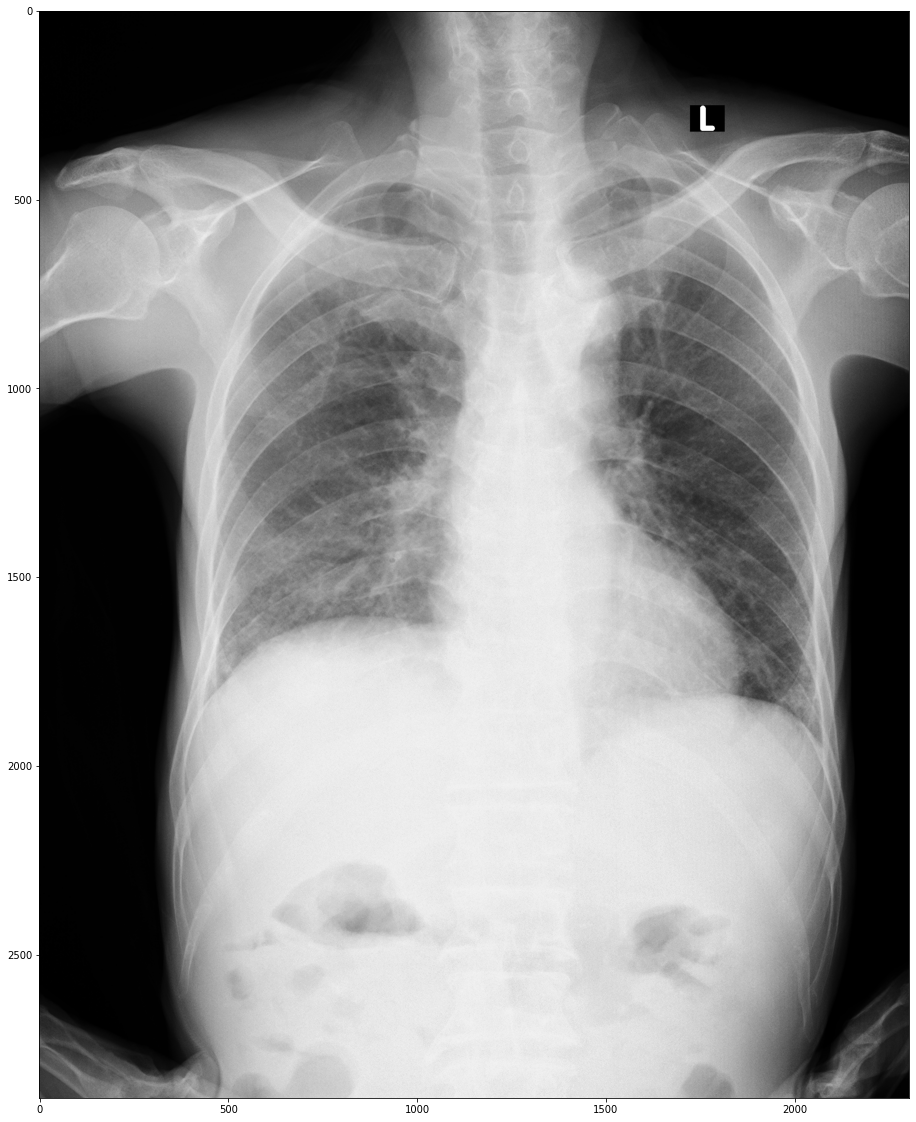

  XY2ST SPACE Transformation started:
    Transforming done! st_mat of shape (35, 1380)
  XY2ST SPACE Transformation started:


/tmp/ipykernel_187030/4154654220.py:3: RuntimeWarning: invalid value encountered in long_scalars
  param = np.sum((p3 - p1) * (p2 - p1)) / l2
/tmp/ipykernel_187030/4154654220.py:7: RuntimeWarning: invalid value encountered in long_scalars
  param = max(0, min(1, np.sum((p3 - p1) * (p2 - p1)) / l2))


    Transforming done! st_mat of shape (45, 612)


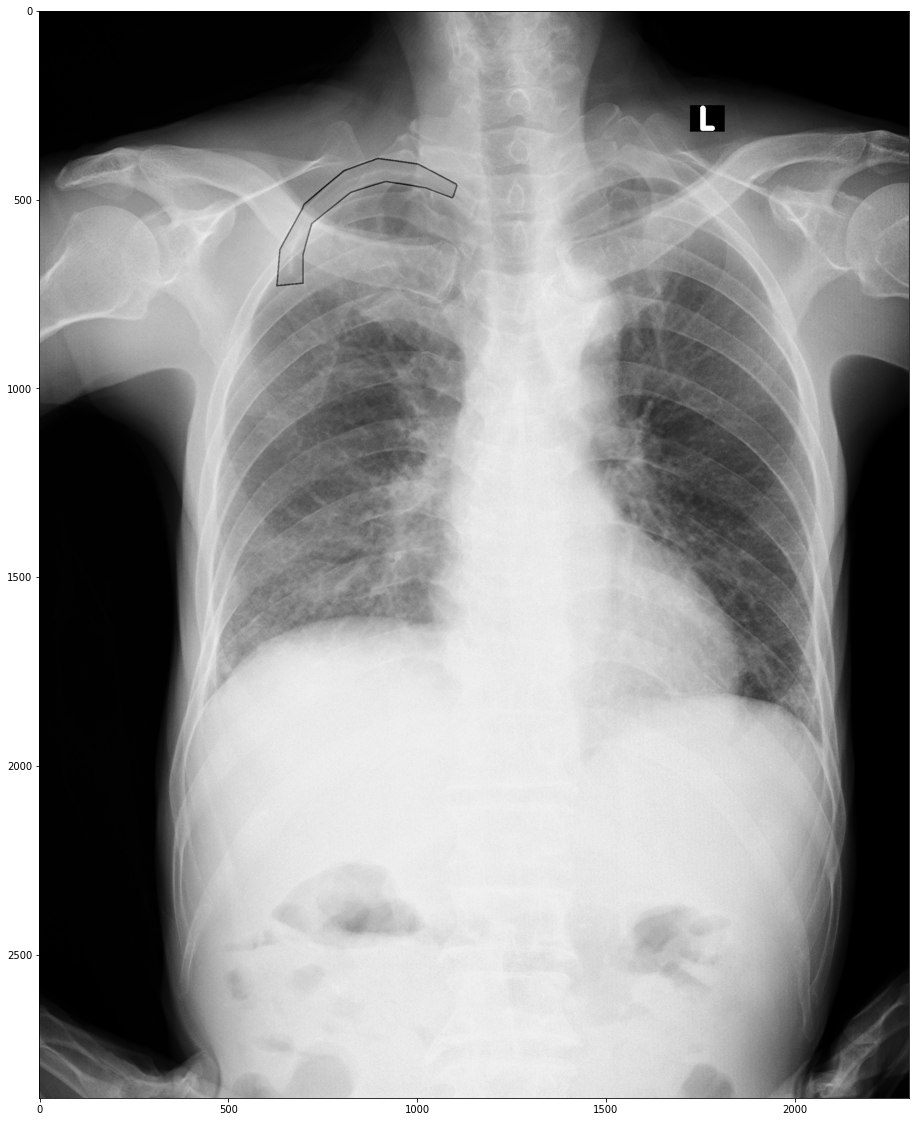

  XY2ST SPACE Transformation started:
    Transforming done! st_mat of shape (35, 1760)
  XY2ST SPACE Transformation started:
    Transforming done! st_mat of shape (49, 626)


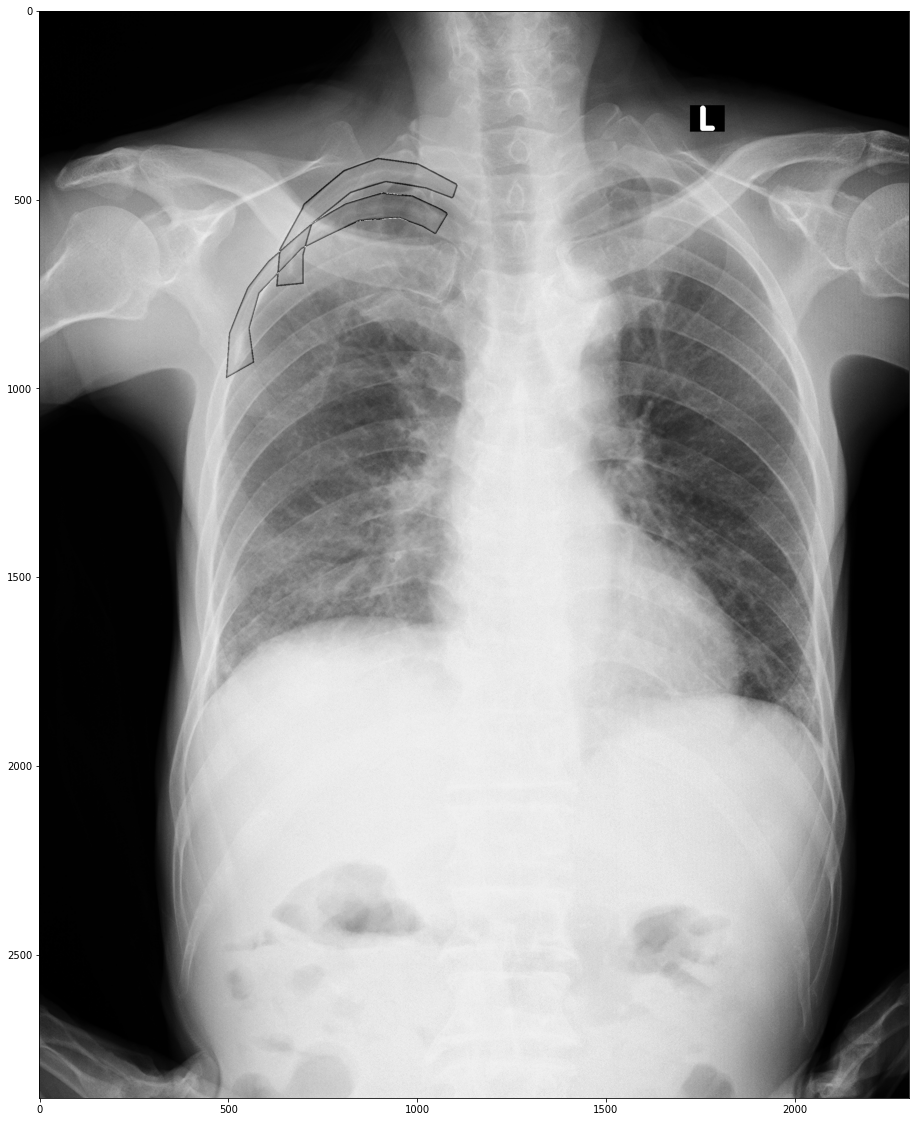

  XY2ST SPACE Transformation started:
    Transforming done! st_mat of shape (37, 1870)
  XY2ST SPACE Transformation started:
    Transforming done! st_mat of shape (49, 1170)


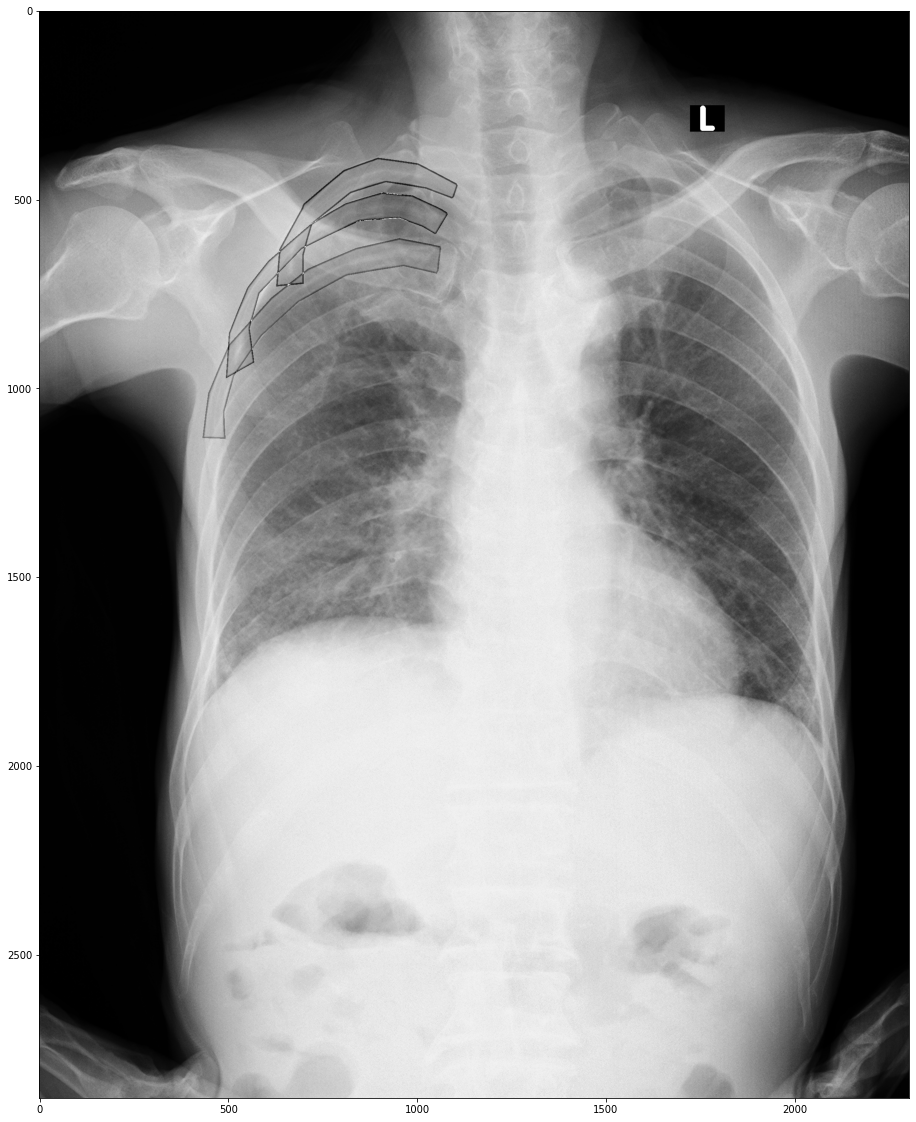

  XY2ST SPACE Transformation started:
    Transforming done! st_mat of shape (38, 2100)
  XY2ST SPACE Transformation started:
    Transforming done! st_mat of shape (44, 1093)


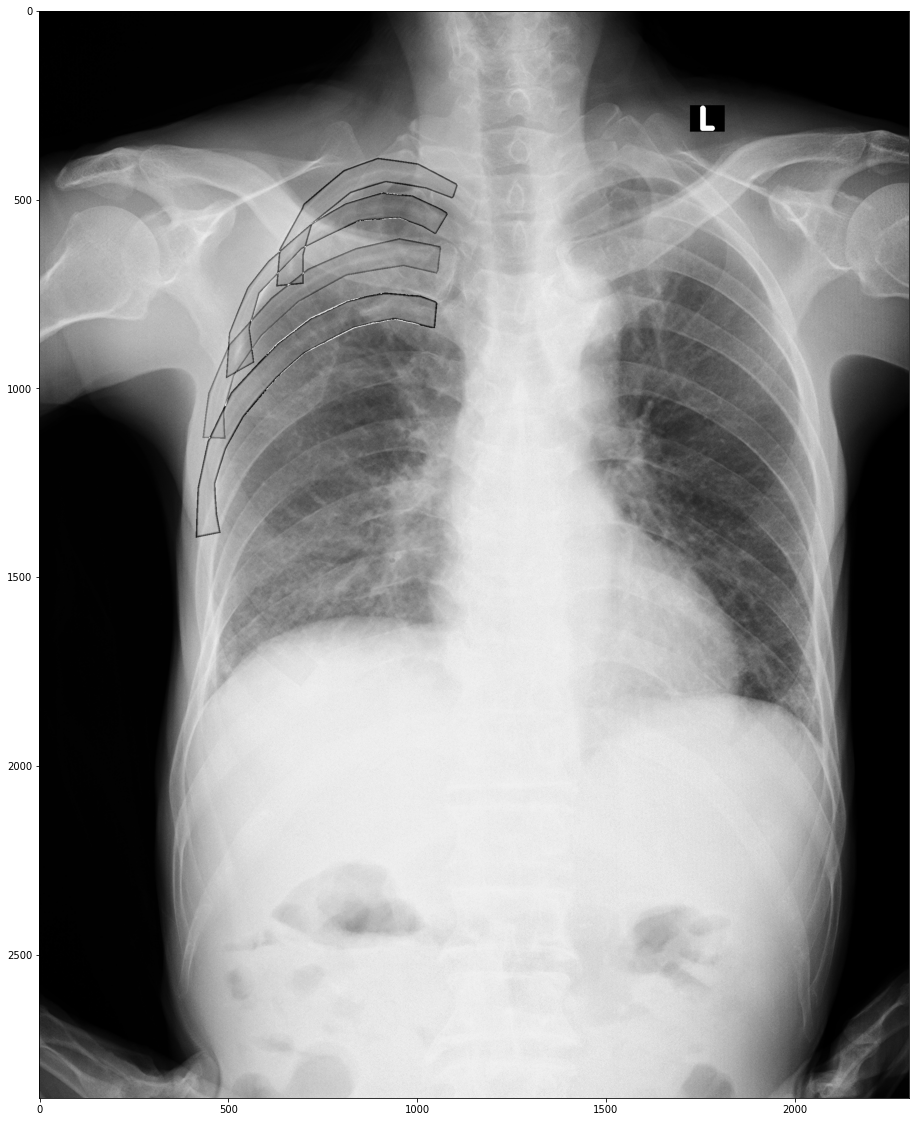

  XY2ST SPACE Transformation started:


KeyboardInterrupt: 

In [715]:
## image & annotation loading
t_start = time()

ann_path = \
'../../ShengNAS2/SharedProjectData/MICCAI_2022/VinDr_RibCXR_Dataset/Annotations/train/Vindr_RibCXR_train_mask.json'
img_dir = \
'../../ShengNAS2/SharedProjectData/MICCAI_2022/VinDr_RibCXR_Dataset/Data/train/img'

save_dir = \
'../../ShengNAS2/SharedProjectData/MICCAI_2022/VinDr_RibCXR_Dataset/Data/train/img_rib_removed'
if not os.path.exists(save_dir): os.makedirs(save_dir)

# key_lst = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
#  'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10']

break_lst = ['R2', 'R3', 'R4','R5', 'R6', 'R7', 'R8',
            'L2', 'L3', 'L4','L5', 'L6', 'L7', 'L8',]

key_lst = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10',
 'L1', 'L2', 'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10']

with open(ann_path, 'r') as f:
    ann = json.load(f)

for img_num in range(196):
    print('currently processing %d img.'%img_num)
    img_path = os.path.join(img_dir, 'VinDr_RibCXR_train_%s.png'%str(img_num).rjust(3, '0'))
    save_path = os.path.join(save_dir, 'VinDr_RibCXR_train_%s.png'%str(img_num).rjust(3, '0'))
    
    img = cv2.imread(img_path)
    img_2 = img.copy()
    img_3 = img.copy()

    k_ext = 5
    k_org = 3

    g_img = cv2. cvtColor(img, cv2. COLOR_BGR2GRAY)
    g_img_2 = g_img.copy()

    deri_st_mat_hist = {}
    # take only img of #0 as a starter trial
    for r_num, key in enumerate(key_lst):
#         print('\ncurrently processing %s ribs, %d left to go...'%(key, len(key_lst)-r_num-1))

        coords = ann[key][str(img_num)]
        ctr = []
        for coord in coords:
            x, y = coord['x'], coord['y']
            ctr.append([x,y])
        ctr = np.array(ctr, dtype=np.int32)


        ## img preprocessing
        x_min, x_max, y_min, y_max = 10000, 0, 10000, 0

        for i in range(len(ctr)):
            x, y = ctr[i]
            if x < x_min: x_min = x
            if x > x_max: x_max = x

            if y < y_min: y_min = y
            if y > y_max: y_max = y

        ## bbox in the form of xywh
        margin = 5
        bbox = [x_min, y_min, x_max-x_min, y_max-y_min]
        wide_bbox = [x_min - margin, y_min - margin, 
                     x_max-x_min + 2*margin, y_max-y_min + 2*margin]

        # find the complete rib ctr
        bg_img_2 = cv2.cvtColor(g_img_2, cv2.COLOR_GRAY2BGR)
        gray_patch_complete = img_2[wide_bbox[1]:wide_bbox[1]+wide_bbox[3], 
                            wide_bbox[0]:wide_bbox[0]+wide_bbox[2]]

        t_ext = bg_img_2.copy()
        cv2.fillPoly(t_ext, pts=[ctr] ,color=(255,0,255))
        cv2.drawContours(t_ext, [ctr], -1, (255, 0, 0), k_ext)
        rib_ext = bg_img_2.copy()
        rib_ext[t_ext==bg_img_2] = 0
        patch_ext = rib_ext[wide_bbox[1]:wide_bbox[1]+wide_bbox[3], 
                            wide_bbox[0]:wide_bbox[0]+wide_bbox[2],:]
        gray_patch_ext = cv2.cvtColor(patch_ext, cv2.COLOR_BGR2GRAY)


        ## find sparse ctr of L5 rib
        ret, thresh = cv2.threshold(gray_patch_ext, 1, 255, 0)
        contours, hierarchy = \
            cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnt = contours[0]
        # calc arclentgh
        arclen = cv2.arcLength(cnt, True)
        # do approx
        eps = 0.0005
        epsilon = arclen * eps
        approx = cv2.approxPolyDP(cnt, epsilon, True)
        approx = expand_ctr(np.squeeze(approx, axis=1)) 
        
        if key in break_lst:
            ctr1, ctr2 = break_rib(approx, key)
            ctrs = [ctr1, ctr2]
            if ctr1.shape[0] > ctr2.shape[0]: scls = [3, 10]
            else: scls = [10, 3]
        else:
             ctrs = [approx]
             scls = [3]

        for ctr_ct, (segment_ctr, scl) in enumerate(zip(ctrs, scls)):
#             print('  %s has %d segments to process, currently processing the %d one;'%(key, len(ctrs), ctr_ct+1))
#             print('  contour is of %d points;'%len(segment_ctr))

            t_org = gray_patch_complete.copy()
            cv2.fillPoly(t_org, pts=[segment_ctr] ,color=(255,0,255))
            cv2.drawContours(t_ext, [segment_ctr], -1, (255, 0, 0), k_org)
            rib_org = gray_patch_complete.copy()
            rib_org[t_org==gray_patch_complete] = 0
            gray_patch_org = cv2.cvtColor(rib_org, cv2.COLOR_BGR2GRAY)

            t_ext = gray_patch_complete.copy()
            cv2.fillPoly(t_ext, pts=[segment_ctr] ,color=(255,0,255))
            cv2.drawContours(t_ext, [segment_ctr], -1, (255, 0, 0), k_ext)
            rib_ext = gray_patch_complete.copy()
            rib_ext[t_ext==gray_patch_complete] = 0
            gray_patch_ext = cv2.cvtColor(rib_ext, cv2.COLOR_BGR2GRAY)


            ## process rib segment coordinates in XY System
            y_idxes, x_idxes = np.ma.where(gray_patch_ext != 0)  ### attention there is a flip here!!!!!
            segment_xy_ls = []
            for x,y in zip(list(x_idxes),list(y_idxes)):
                segment_xy_ls.append((x,y))
            segment_xy = np.array(segment_xy_ls, dtype=np.int64)


            ## arrange ctr Tangent line set and calculate culmulate distance
            line_sets = []
            ctr_neighbor_dist = []
            d = 0
            for i in range(segment_ctr.shape[0]):
                if i == segment_ctr.shape[0]-1:
                    p1 = segment_ctr[i]
                    p2 = segment_ctr[0]
                else:
                    p1 = segment_ctr[i]
                    p2 = segment_ctr[i+1]

                line_sets.append([p1, p2])
                d += np.sqrt(np.sum((p1-p2)**2))
                ctr_neighbor_dist.append(d.copy())


            ## ST SPACE TREANSFORMATION
            print('  XY2ST SPACE Transformation started:')
            segment_st_ls = []
            tmax = int(ctr_neighbor_dist[-1]) + 1
            smax = 0
            st_mat = np.zeros((2000, tmax), dtype=img.dtype)

            for ct, p3 in enumerate(segment_xy):
#                 if ct%10000==0: print('    %d out of %d is processed;'%(ct, segment_xy.shape[0]))

                d_min= 10000
                idx = 0
                l_proj = 0
                for i in range(len(line_sets)):
                    p1 = line_sets[i][0]
                    p2 = line_sets[i][1]

                    l_proj_c, d = proj_calc(p1, p2, p3)

                    if d < d_min:
                        d_min = np.copy(d)
                        l_proj = np.copy(l_proj_c)
                        idx = np.copy(i)

                t = int(proj_coord(idx, l_proj, ctr_neighbor_dist))
                s = int(d_min)
                if s > smax: smax = np.copy(s)
                segment_st_ls.append( (s, t) ) ### record to match the segment_xy set they are 121 correspondence

                x,y = p3
                st_mat[s,t] = gray_patch_ext[y,x].copy()
            st_mat = st_mat[:smax+1, :].astype(np.int64)
            print('    Transforming done! st_mat of shape %s'%str(st_mat.shape))


            ## DI/Ds calculation
            deri_st_mat = np.zeros(st_mat.shape, dtype=np.int64)
            deri_st_mat[0,:] = st_mat[0,:].copy()

            for i in range(1, st_mat.shape[0]):
                deri_st_mat[i,:] = (st_mat[i,:] - st_mat[i-1,:]).copy()
            deri_st_mat_hist[key] = deri_st_mat.copy()


            #   smooth DI/Ds     
            if key in ['R1', 'L1']: scl = 10
            if key in ['R10', 'L10' ]: scl = 20

            smoothed_deri_st_mat = gaussian_filter(deri_st_mat.astype(np.float64), 
                                                   sigma = (0, st_mat.shape[-1] * scl), mode='nearest')
            smoothed_st_mat = np.zeros(st_mat.shape, dtype=np.float64)
            smoothed_st_mat[0,:] = smoothed_deri_st_mat[0,:].copy()


            ## reintegrate smooth DI/Ds     
            for i in range(1, st_mat.shape[0]):
                smoothed_st_mat[i,:] = (smoothed_deri_st_mat[i,:] + smoothed_st_mat[i-1,:]).copy()
            
            smoothed_st_mat = exclude_outliers(smoothed_st_mat)
            smoothed_st_mat = ses_smoothing(smoothed_st_mat, alpha=0.5, ligher_edge=False)

            
            ## ST -> XY space transformation
            gray_patch_ext_bone = np.zeros(gray_patch_ext.shape, dtype=smoothed_st_mat.dtype)
            for (s,t), (x,y) in zip(segment_st_ls, segment_xy):
                smoothed_I = smoothed_st_mat[s,t].copy()
                gray_patch_ext_bone[y,x] = np.copy(smoothed_I)

            gray_patch_ext_bone[gray_patch_ext_bone<0] = 0
            gray_patch_ext_bone = gray_patch_ext_bone.astype('uint8')
            gray_patch_org_bone = gray_patch_ext_bone.copy()
            gray_patch_org_bone[gray_patch_org==0] = 0

            rib = np.zeros(g_img_2.shape, dtype=g_img_2.dtype)
            rib[wide_bbox[1]:wide_bbox[1]+wide_bbox[3], wide_bbox[0]:wide_bbox[0]+wide_bbox[2]] = \
                gray_patch_org_bone
            g_img_2 = (g_img_2 - rib).copy()
            
#             imputer = KNNImputer(n_neighbors=5)
#             data = g_img_2.copy()
#             data[data<=0] = np.nan
#             data = imputer.fit_transform(data)
#             data = data.astype(g_img_2.dtype)
            g_img_2[g_img_2<0] = 0
            
        fig = plt.figure(figsize=(20,20))
        ax = fig.add_subplot(111)
        ax.imshow(g_img_2, cmap='gray')
        plt.show()
    
#     cv2.imwrite(save_path, g_img_2)
    print('derib took %.3f secs...\n'%(time()-t_start))

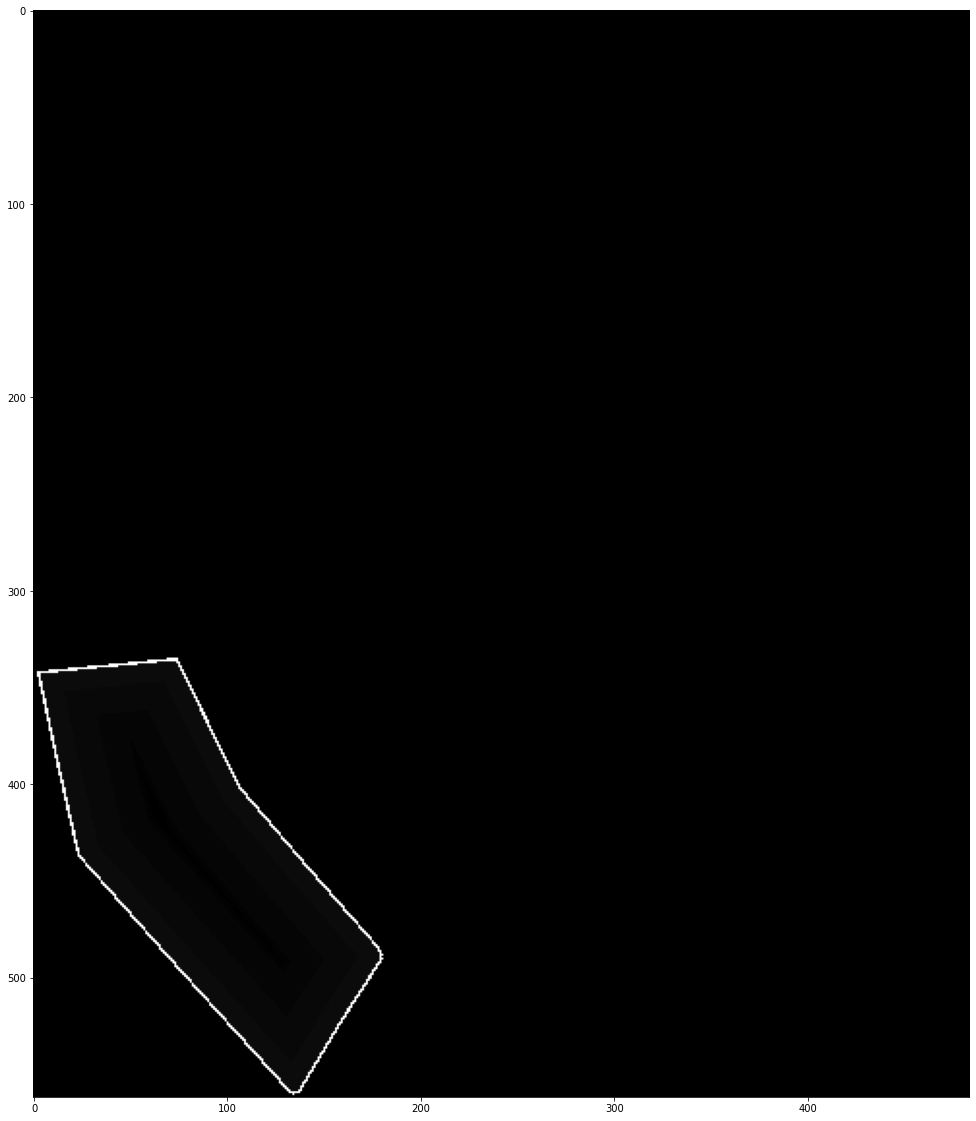

In [698]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.imshow(gray_patch_org_bone, cmap='gray')
plt.show()

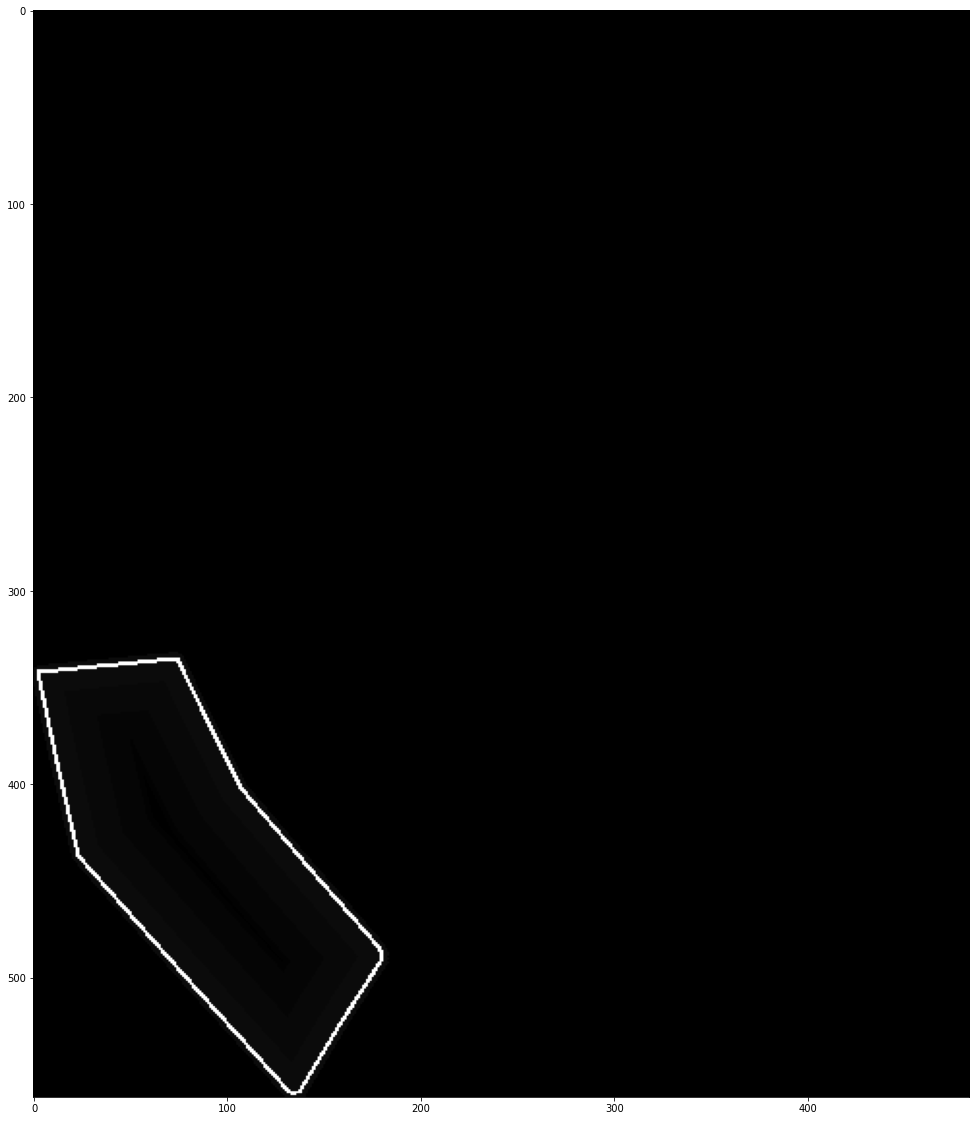

In [699]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.imshow(gray_patch_ext_bone, cmap='gray')
plt.show()

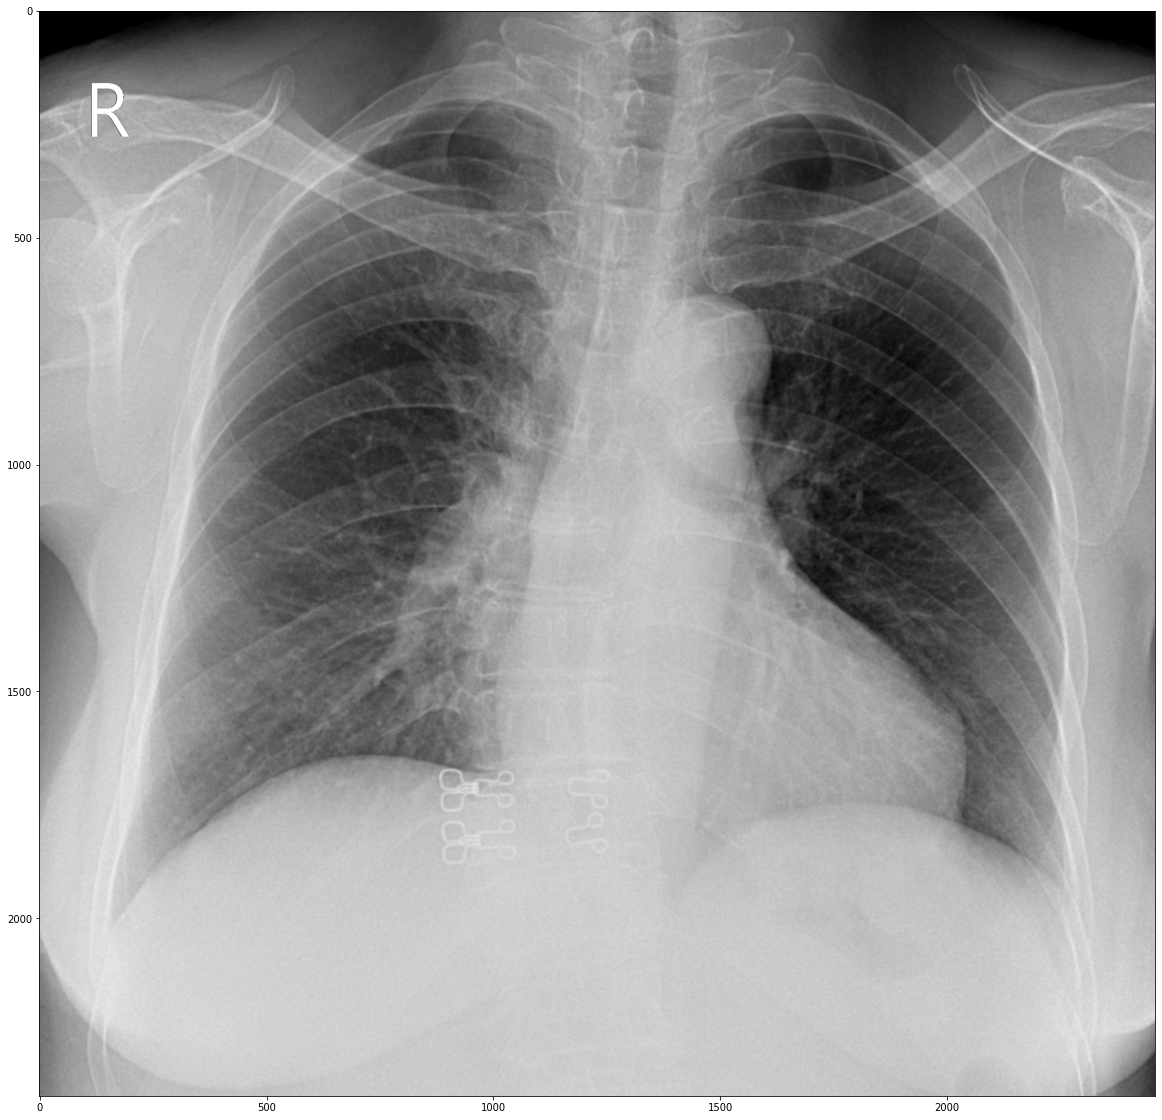

In [557]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
ax.imshow(g_img_2, cmap='gray')
# plt.savefig("img_0.png",dpi=200)
plt.show()

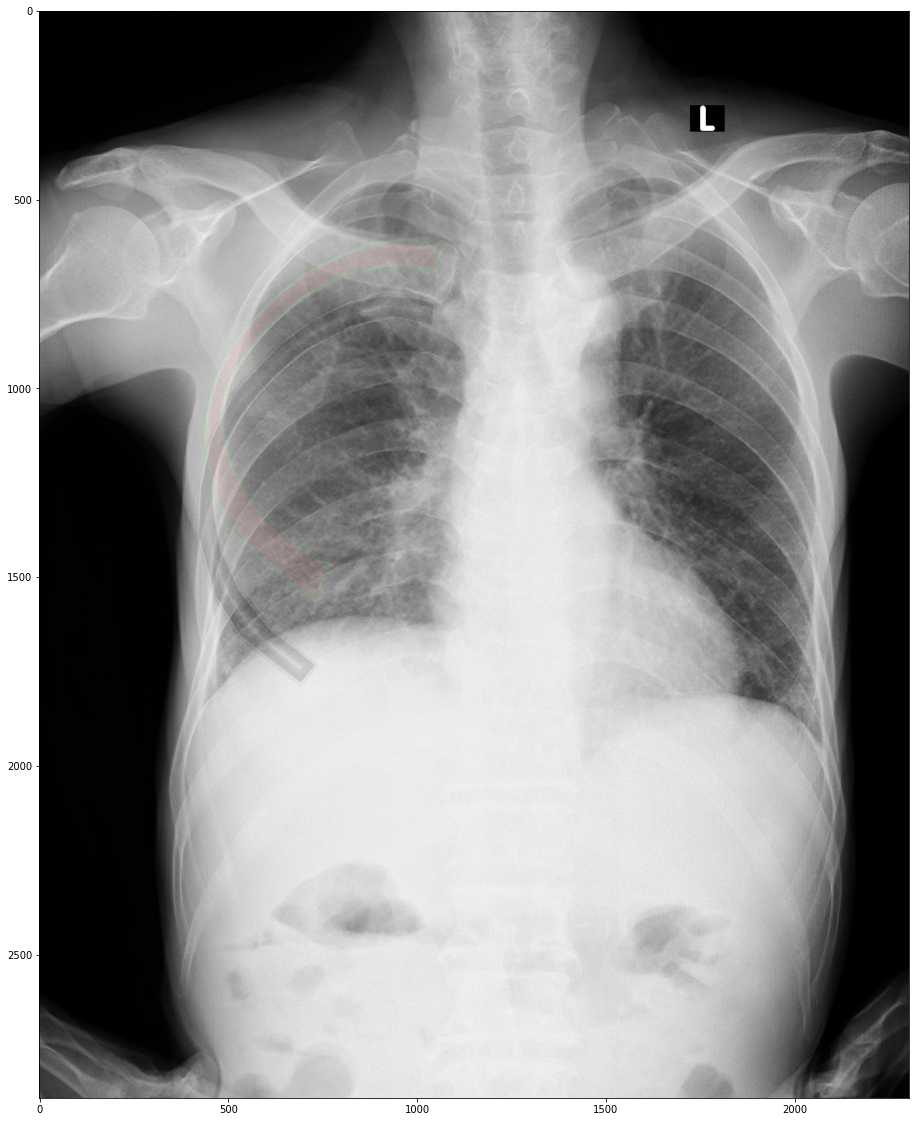

In [203]:
coords = ann['R4']['0']
ctr = []
for coord in coords:
    x, y = coord['x'], coord['y']
    ctr.append([x,y])
ctr = np.array(ctr, dtype=np.int32)

g_img_2_temp = cv2.cvtColor(g_img_2, cv2.COLOR_GRAY2BGR)
g_img_2_temp_2 = g_img_2_temp.copy()
# img_temp = img.copy()
cv2.fillPoly(g_img_2_temp_2, pts=[ctr] ,color=(255,0,0, 0.2))
k = 10
cv2.drawContours(g_img_2_temp_2, [ctr], -1, (0, 255, 0), k)


alpha = 0.05
image_new = cv2.addWeighted(g_img_2_temp_2, alpha, g_img_2_temp, 1 - alpha, 0)

# bg_img_4 = bg_img_3.copy()
# cv2.drawContours(bg_img_4, [ctr], -1, (255, 0, 0), k)
fig = plt.figure(figsize=(20,20))
plt.imshow(image_new)
plt.show()